# Predicting Transcription Start sites in promoter sequences

In [2]:
using wgregseq, CSV, DataFrames, CairoMakie, BioSequences, Statistics

wgregseq.viz.default_makie!()

palette_dict, palette = wgregseq.viz.get_colors()

2-element Vector{Any}:
 Dict("light_blue" => "#5fa6db", "light_red" => "#e89290", "primary_blue" => "#3373ba", "green" => "#488d48", "pale_red" => "#eeb3b0", "light_green" => "#99d097", "primary_green" => "#5cb75b", "light_black" => "#8c8c8c", "gold" => "#b1843e", "pale_blue" => "#8ec1e8"…)
 ["#4c4b4c", "#3373ba", "#5cb75b", "#8066ad", "#f0ad4d", "#d8534f"]

## dgoR

In [3]:
df = wgregseq.utils.import_twist_order("../../../data/twist_orders/2022-02-15_twist_order.csv")
insertcols!(df, 4, :promoter_sequence => map(x -> x[27:186], df.sequence))
seq = df[df.promoter .== "dgoRp", "promoter_sequence"][1] |> string

"TGTAGTACAACAATATAAGTTTGTACTACATTACACGCACGGCAAACGCGAACGTCATCACGCTGGTACTACAAAGTTGCCGCGTTATGCATCGATCGGGGTAAAGTAGAGAAGAACATACAGAGCACAAGGACTCTCCATGACTCTCAATAAAACCGAT"

In [4]:
num_seq_dict = Dict('A' => 0, 'C' => 1, 'G' => 2, 'T' => 3)

Dict{Char, Int64} with 4 entries:
  'A' => 0
  'G' => 2
  'T' => 3
  'C' => 1

In [5]:
p = wgregseq.promoter_finder.Promoter_Calculator()
tss_list = []
int_to_base = Dict(1 => 'A', 2 => 'C', 3 => 'G', 4 => 'T')
ext_seq = uppercase("ACTAGATTCAGGGATAACATGGCACT") * seq * uppercase("GGGCCCagctgtcaccggatgtgctttcc")
r = p(ext_seq)["Forward_Predictions_per_TSS"]
_x = [(key, r[key]["dG_total"]) for key in keys(r) |> collect]
tss = _x[argmin([x[2] - 140 for x in _x])][1]
push!(tss_list, tss)

1-element Vector{Any}:
 67

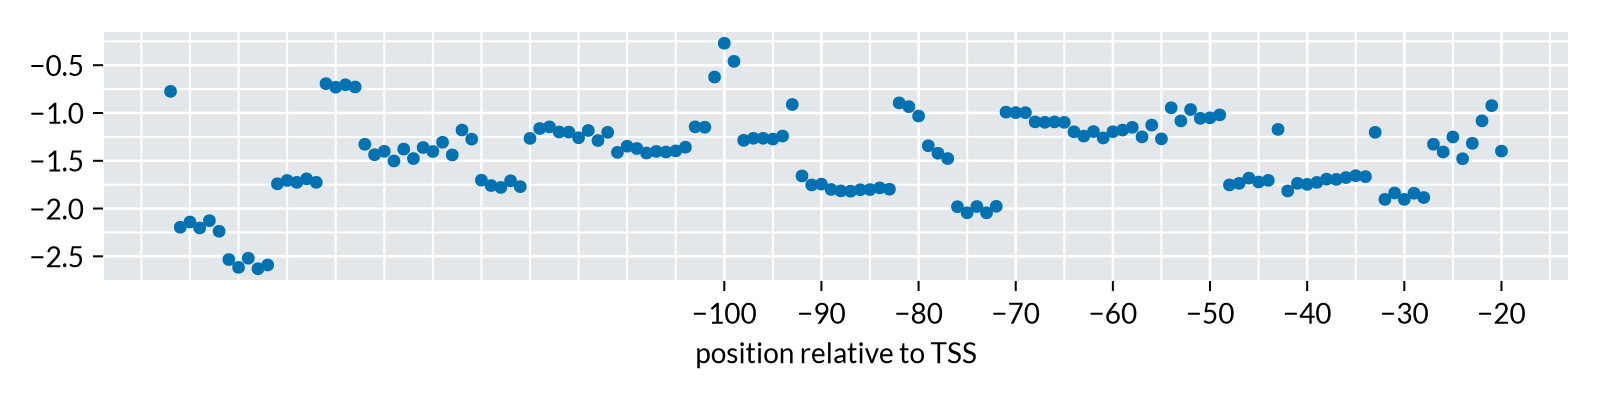

In [6]:
fig = Figure(size=(800, 200))
ax = Axis(fig[1, 1], xticks=(-100:10:50), xlabel="position relative to TSS")

scatter!(ax, [x[1]-215 for x in _x], [x[2] for x in _x])

fig

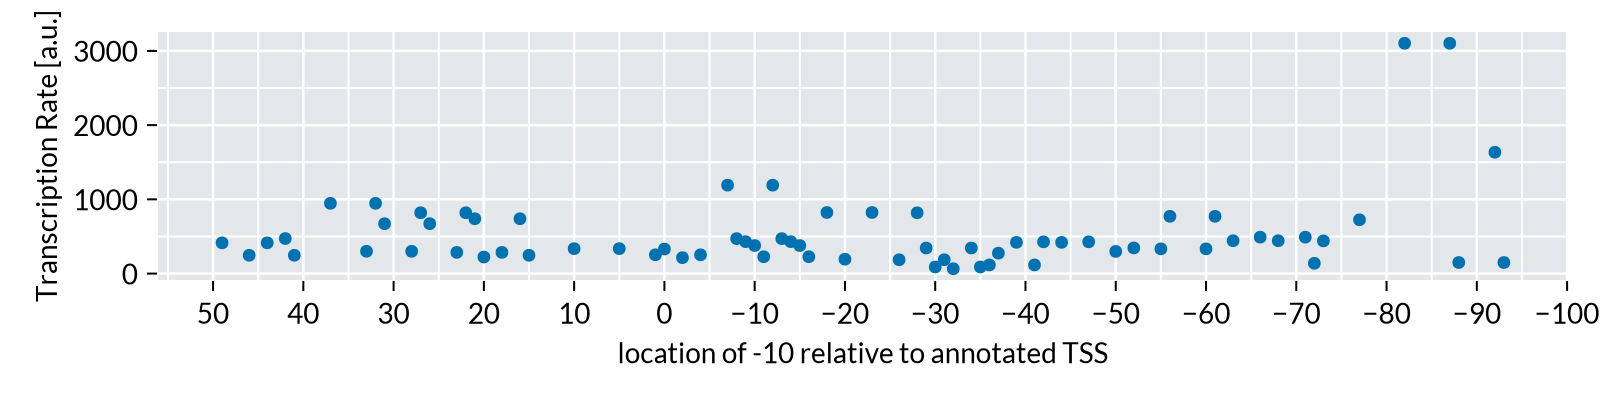

In [7]:
tss_df = DataFrame()

for m in collect(keys(r))
    append!(tss_df, DataFrame(r[m]))
end
sort!(tss_df, :dG_total)
tss_df.TSS = tss_df.TSS .- 140
tss_df.hex10_position = tss_df.hex10_position .- 140
cdf = combine(groupby(tss_df, :hex10_position), :Tx_rate => maximum)

fig = Figure(size=(800, 200))
ax = Axis(fig[1, 1], xticks=(-100:10:50), xlabel="location of -10 relative to annotated TSS", ylabel="Transcription Rate [a.u.]")
ax.xreversed = true
scatter!(ax, cdf.hex10_position, cdf.Tx_rate_maximum)
save("dgoR_min_ten.pdf", fig)

fig

## znuC

In [8]:
df = wgregseq.utils.import_twist_order("../../../data/twist_orders/2022-02-15_twist_order.csv")
insertcols!(df, 4, :promoter_sequence => map(x -> x[27:186], df.sequence))
seq = df[df.promoter .== "znuCp", "promoter_sequence"][1] |> string

"GTGTTGCACCTCCCCAGAGAGCGGCGGATAATGCTGCGAAAAGAAGCGTTTTTTTATGTAACATAATGCGACCAATAATCGTAATGAATATGAGAAGTGTGATATTATAACATTTCATGACTACTGCAAGACTAAAATTAACATGACAAGTCTGGTTTCC"

In [9]:
p = wgregseq.promoter_finder.Promoter_Calculator()
tss_list = []
int_to_base = Dict(1 => 'A', 2 => 'C', 3 => 'G', 4 => 'T')
ext_seq = uppercase("ACTAGATTCAGGGATAACATGGCACT") * seq * uppercase("GGGCCCagctgtcaccggatgtgctttcc")
r = p(ext_seq)["Forward_Predictions_per_TSS"]
_x = [(key, r[key]["dG_total"]) for key in keys(r) |> collect]
tss = _x[argmin([x[2] - 140 for x in _x])][1]
push!(tss_list, tss)

1-element Vector{Any}:
 140

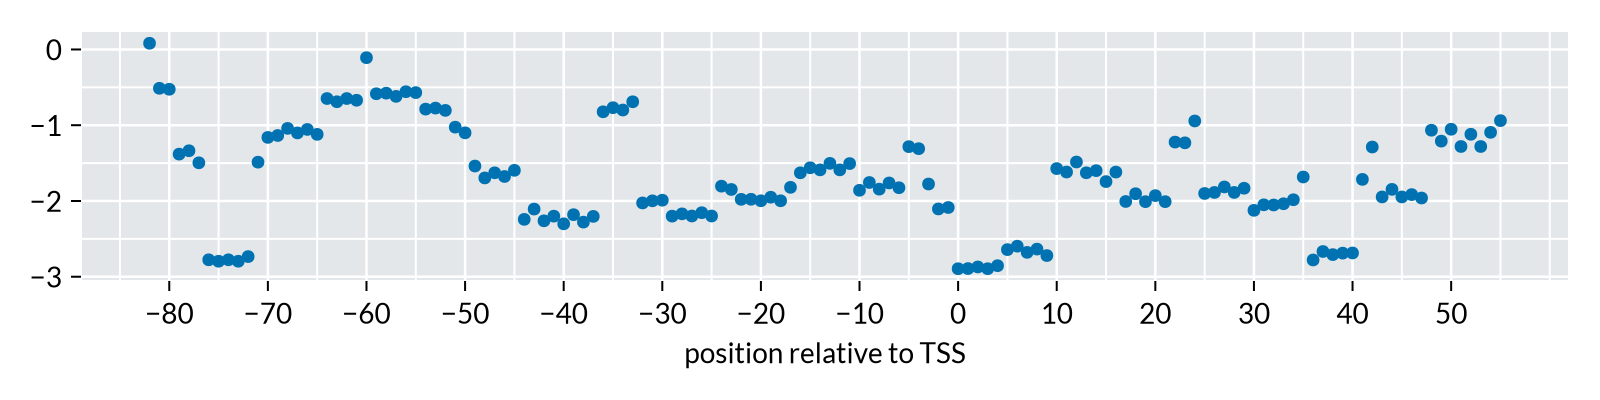

In [10]:
fig = Figure(size=(800, 200))
ax = Axis(fig[1, 1], xticks=(-100:10:50), xlabel="position relative to TSS")

scatter!(ax, [x[1]-140 for x in _x], [x[2] for x in _x])

fig

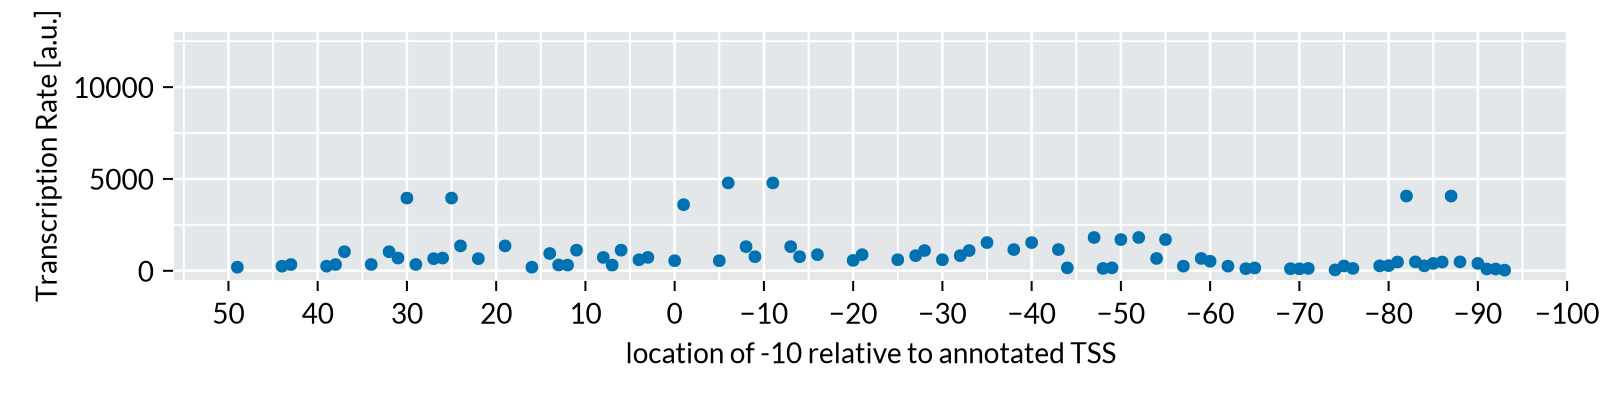

In [11]:
tss_df = DataFrame()

for m in collect(keys(r))
    append!(tss_df, DataFrame(r[m]))
end
sort!(tss_df, :dG_total)
tss_df.TSS = tss_df.TSS .- 140
tss_df.hex10_position = tss_df.hex10_position .- 140
cdf = combine(groupby(tss_df, :hex10_position), :Tx_rate => maximum)

fig = Figure(size=(800, 200))
ax = Axis(fig[1, 1], xticks=(-100:10:50), xlabel="location of -10 relative to annotated TSS", ylabel="Transcription Rate [a.u.]")
ax.xreversed = true
scatter!(ax, cdf.hex10_position, cdf.Tx_rate_maximum)
ylims!(-500, 13000)
save("znuC_min_ten_wt.pdf", fig)

fig

In [12]:
_seq = collect(seq)
_seq[27] = 'T'
_seq = join(_seq)

"GTGTTGCACCTCCCCAGAGAGCGGCGTATAATGCTGCGAAAAGAAGCGTTTTTTTATGTAACATAATGCGACCAATAATCGTAATGAATATGAGAAGTGTGATATTATAACATTTCATGACTACTGCAAGACTAAAATTAACATGACAAGTCTGGTTTCC"

In [13]:
ext_seq = uppercase("ACTAGATTCAGGGATAACATGGCACT") * _seq * uppercase("GGGCCCagctgtcaccggatgtgctttcc")
r = p(ext_seq)["Forward_Predictions_per_TSS"]
_x = [(key, r[key]["dG_total"]) for key in keys(r) |> collect]
tss = _x[argmin([x[2] - 140 for x in _x])][1]

67

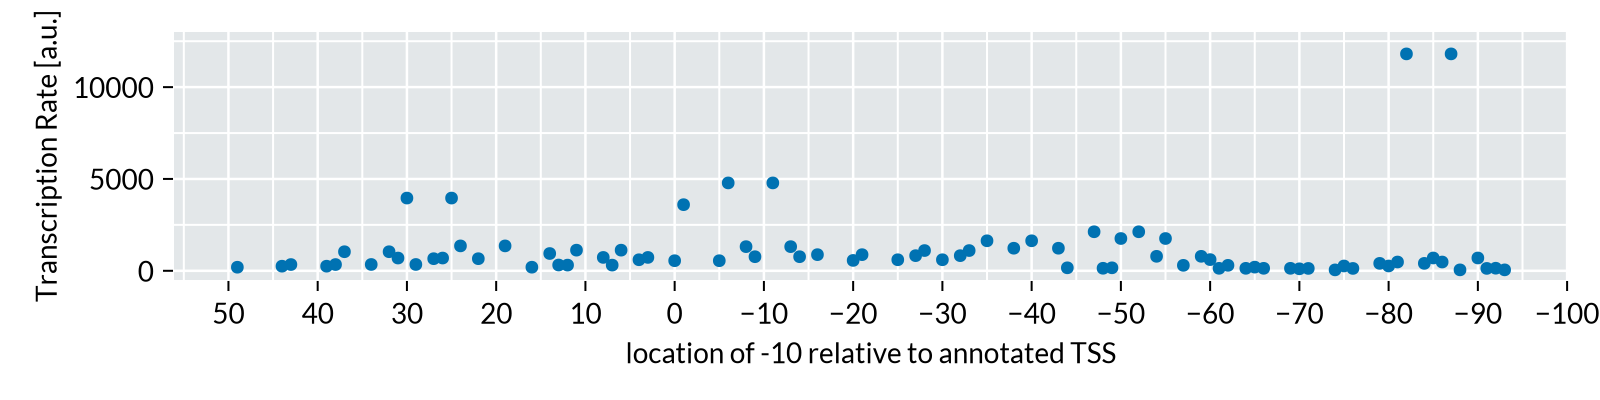

In [14]:
tss_df = DataFrame()

for m in collect(keys(r))
    append!(tss_df, DataFrame(r[m]))
end
sort!(tss_df, :dG_total)
tss_df.TSS = tss_df.TSS .- 140
tss_df.hex10_position = tss_df.hex10_position .- 140
cdf = combine(groupby(tss_df, :hex10_position), :Tx_rate => maximum)

fig = Figure(size=(800, 200))
ax = Axis(fig[1, 1], xticks=(-100:10:50), xlabel="location of -10 relative to annotated TSS", ylabel="Transcription Rate [a.u.]")

scatter!(ax, cdf.hex10_position, cdf.Tx_rate_maximum)
ylims!(-500, 13000)
ax.xreversed = true
save("znuC_min_ten_mut.pdf", fig)

fig

## araB

In [15]:
df = wgregseq.utils.import_twist_order("../../../data/twist_orders/2022-02-15_twist_order.csv")
insertcols!(df, 4, :promoter_sequence => map(x -> x[27:186], df.sequence))
seq = df[df.promoter .== "araBp", "promoter_sequence"][1] |> string

"TCCACATTGATTATTTGCACGGCGTCACACTTTGCTATGCCATAGCATTTTTATCCATAAGATTAGCGGATCCTACCTGACGCTTTTTATCGCAACTCTCTACTGTTTCTCCATACCCGTTTTTTTGGATGGAGTGAAACGATGGCGATTGCAATTGGCC"

In [16]:
p = wgregseq.promoter_finder.Promoter_Calculator()
tss_list = []
int_to_base = Dict(1 => 'A', 2 => 'C', 3 => 'G', 4 => 'T')
ext_seq = uppercase("ACTAGATTCAGGGATAACATGGCACT") * seq * uppercase("GGGCCCagctgtcaccggatgtgctttcc")
r = p(ext_seq)["Forward_Predictions_per_TSS"]
_x = [(key, r[key]["dG_total"]) for key in keys(r) |> collect]
tss = _x[argmin([x[2] - 140 for x in _x])][1]
push!(tss_list, tss)

1-element Vector{Any}:
 147

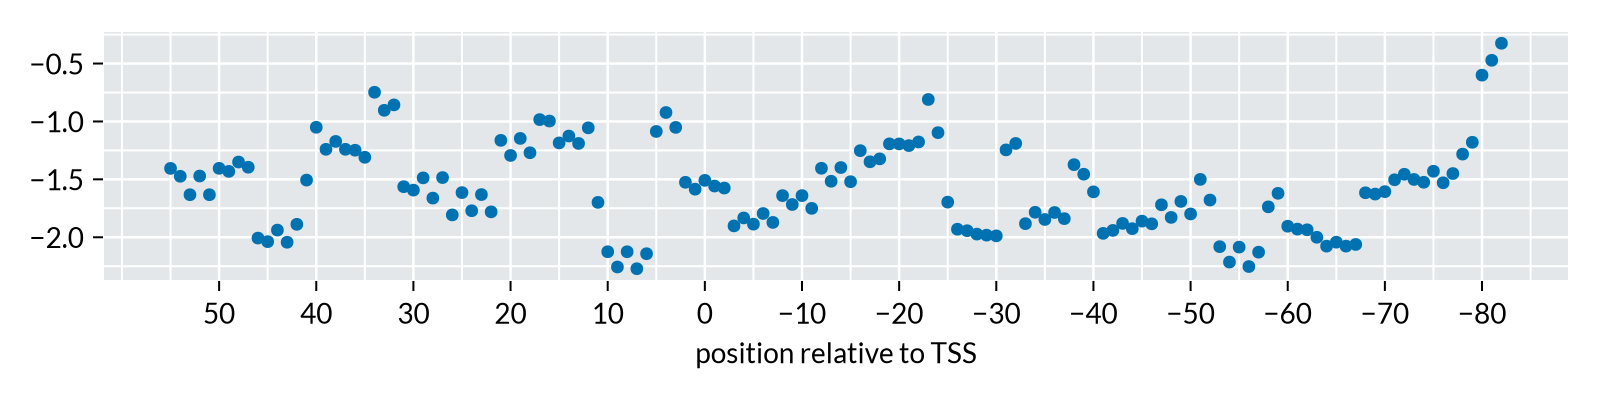

In [17]:
fig = Figure(size=(800, 200))
ax = Axis(fig[1, 1], xticks=(-100:10:50), xlabel="position relative to TSS")

scatter!(ax, [x[1]-140 for x in _x], [x[2] for x in _x])
ax.xreversed = true
fig

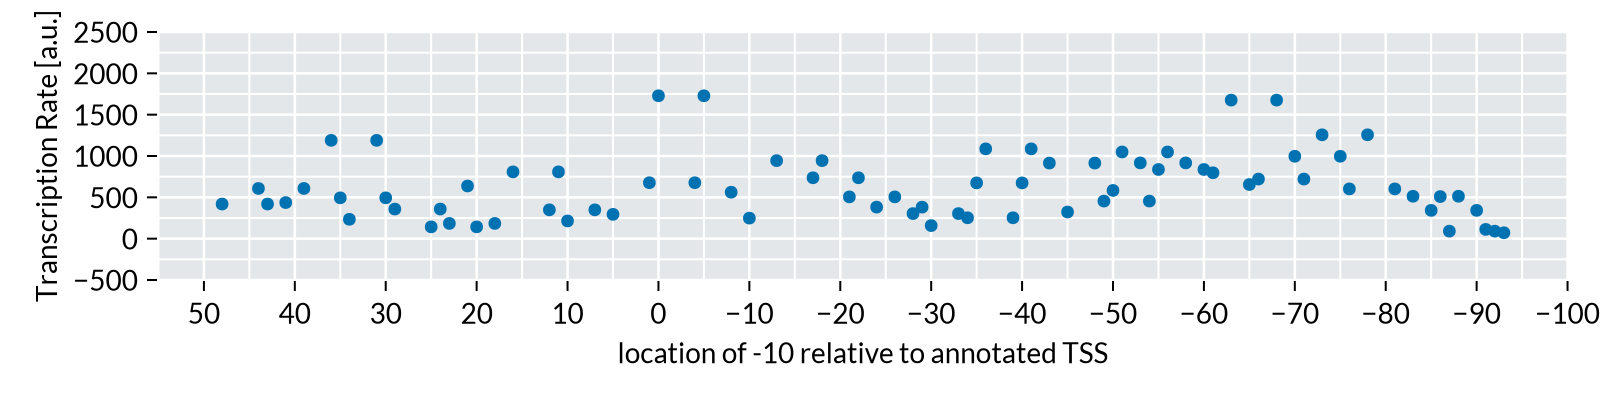

In [18]:
tss_df = DataFrame()

for m in collect(keys(r))
    append!(tss_df, DataFrame(r[m]))
end
sort!(tss_df, :dG_total)
tss_df.TSS = tss_df.TSS .- 140
tss_df.hex10_position = tss_df.hex10_position .- 140
cdf = combine(groupby(tss_df, :hex10_position), :Tx_rate => maximum)

fig = Figure(size=(800, 200))
ax = Axis(fig[1, 1], xticks=(-100:10:50), xlabel="location of -10 relative to annotated TSS", ylabel="Transcription Rate [a.u.]")
ax.xreversed = true
scatter!(ax, cdf.hex10_position, cdf.Tx_rate_maximum)
ylims!(-500, 2500)
save("araB_min_ten_wt.pdf", fig)

fig

In [19]:
_seq = collect(seq)
_seq[34] = 'A'
_seq = join(_seq)

"TCCACATTGATTATTTGCACGGCGTCACACTTTACTATGCCATAGCATTTTTATCCATAAGATTAGCGGATCCTACCTGACGCTTTTTATCGCAACTCTCTACTGTTTCTCCATACCCGTTTTTTTGGATGGAGTGAAACGATGGCGATTGCAATTGGCC"

In [20]:
ext_seq = uppercase("ACTAGATTCAGGGATAACATGGCACT") * _seq * uppercase("GGGCCCagctgtcaccggatgtgctttcc")
r = p(ext_seq)["Forward_Predictions_per_TSS"]
_x = [(key, r[key]["dG_total"]) for key in keys(r) |> collect]
tss = _x[argmin([x[2] - 140 for x in _x])][1]

71

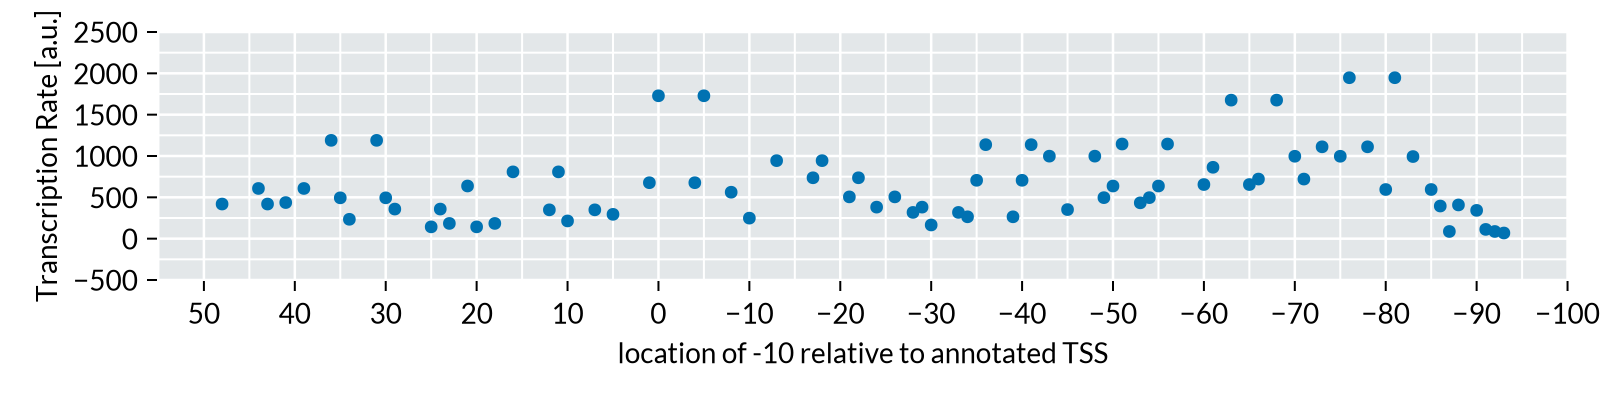

In [21]:
tss_df = DataFrame()

for m in collect(keys(r))
    append!(tss_df, DataFrame(r[m]))
end
sort!(tss_df, :dG_total)
tss_df.TSS = tss_df.TSS .- 140
tss_df.hex10_position = tss_df.hex10_position .- 140
cdf = combine(groupby(tss_df, :hex10_position), :Tx_rate => maximum)

fig = Figure(size=(800, 200))
ax = Axis(fig[1, 1], xticks=(-100:10:50), xlabel="location of -10 relative to annotated TSS", ylabel="Transcription Rate [a.u.]")

scatter!(ax, cdf.hex10_position, cdf.Tx_rate_maximum)
ylims!(-500, 2500)
ax.xreversed = true
save("araB_min_ten_mut.pdf", fig)

fig

## xylF

In [3]:
df = wgregseq.utils.import_twist_order("../../../data/twist_orders/2022-02-15_twist_order.csv")
insertcols!(df, 4, :promoter_sequence => map(x -> x[27:186], df.sequence))
seq = df[df.promoter .== "xylFp", "promoter_sequence"][1] |> string

"AATTGCGCAACAAAAGTAAGATCTCGGTCATAAATCAAGAAATAAACCAAAAATCGTAATCGAAAGATAAAAATCTGTAATTGTTTTCCCCTGTTTAGTTGCTAAAAATTGGTTACGTTTATCGCGGTGATTGTTACTTATTAAAACTGTCCTCTAACTA"

In [52]:
p = wgregseq.promoter_finder.Promoter_Calculator()
tss_list = []
int_to_base = Dict(1 => 'A', 2 => 'C', 3 => 'G', 4 => 'T')
ext_seq = uppercase("ACTAGATTCAGGGATAACATGGCACT") * seq * uppercase("GGGCCCagctgtcaccggatgtgctttcc")
r = p(ext_seq)["Forward_Predictions_per_TSS"]
_x = [(key, r[key]["dG_total"]) for key in keys(r) |> collect]
tss = _x[argmin([x[2] - 140 for x in _x])][1]
push!(tss_list, tss)

1-element Vector{Any}:
 144

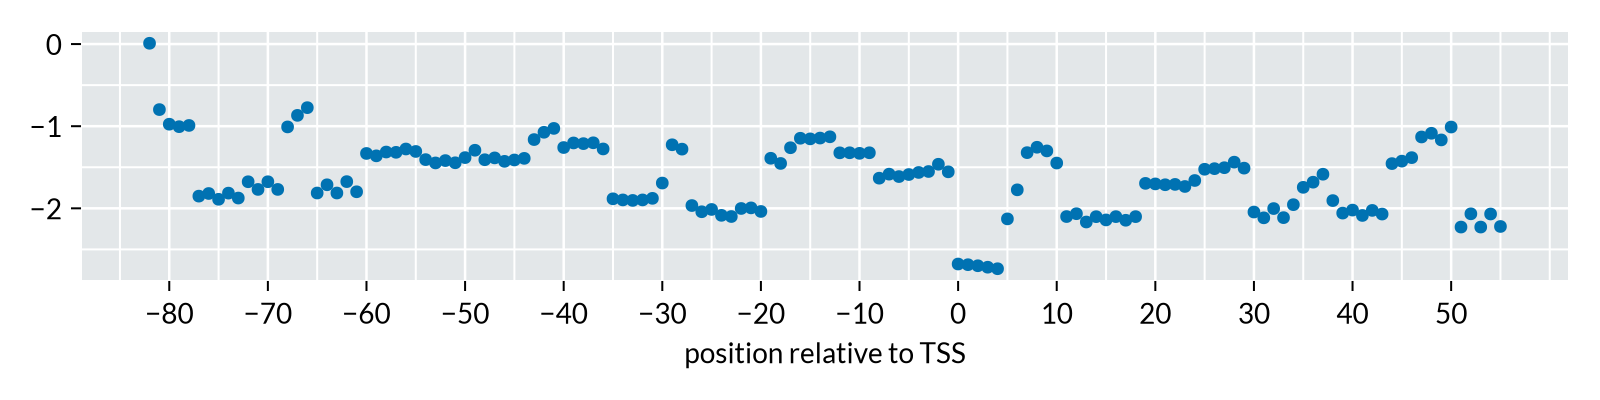

In [53]:
fig = Figure(size=(800, 200))
ax = Axis(fig[1, 1], xticks=(-100:10:50), xlabel="position relative to TSS")

scatter!(ax, [x[1]-140 for x in _x], [x[2] for x in _x])
ax.xreversed = false
fig

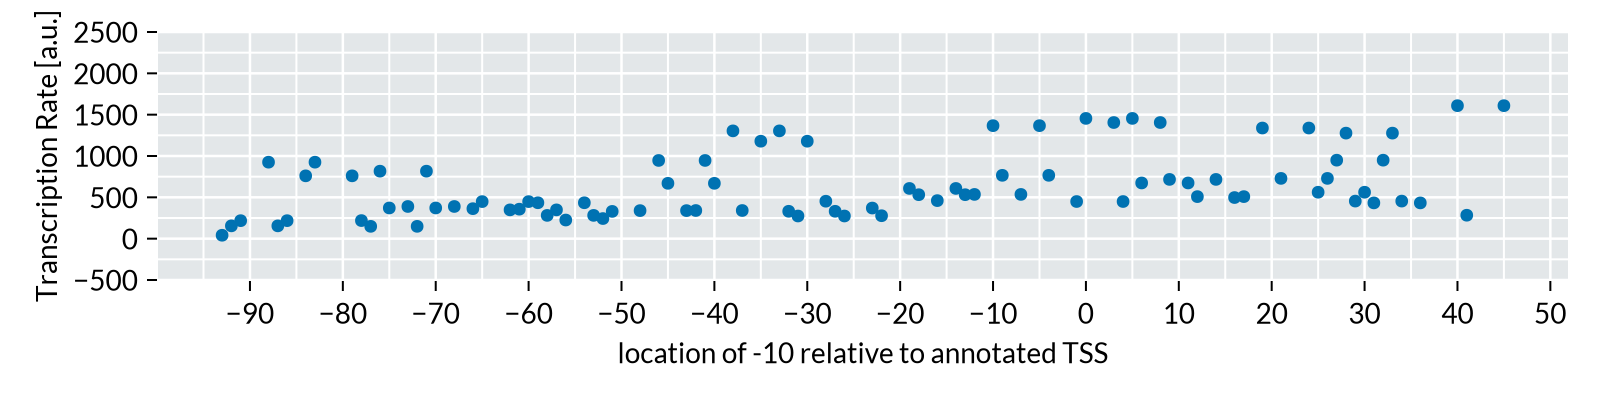

In [54]:
tss_df = DataFrame()

for m in collect(keys(r))
    append!(tss_df, DataFrame(r[m]))
end
sort!(tss_df, :dG_total)
tss_df.TSS = tss_df.TSS .- 140
tss_df.hex10_position = tss_df.hex10_position .- 140
cdf = combine(groupby(tss_df, :hex10_position), :Tx_rate => maximum)

fig = Figure(size=(800, 200))
ax = Axis(fig[1, 1], xticks=(-100:10:50), xlabel="location of -10 relative to annotated TSS", ylabel="Transcription Rate [a.u.]")

scatter!(ax, cdf.hex10_position, cdf.Tx_rate_maximum)
ylims!(-500, 2500)
save("xylF_min_ten_wt.pdf", fig)

fig

In [55]:
_seq[91]

'T': ASCII/Unicode U+0054 (category Lu: Letter, uppercase)

In [56]:
_seq = collect(seq)
_seq[91] = 'T'
_seq = join(_seq)

"AATTGCGCAACAAAAGTAAGATCTCGGTCATAAATCAAGAAATAAACCAAAAATCGTAATCGAAAGATAAAAATCTGTAATTGTTTTCCCTTGTTTAGTTGCTAAAAATTGGTTACGTTTATCGCGGTGATTGTTACTTATTAAAACTGTCCTCTAACTA"

In [57]:
ext_seq = uppercase("ACTAGATTCAGGGATAACATGGCACT") * _seq * uppercase("GGGCCCagctgtcaccggatgtgctttcc")
r = p(ext_seq)["Forward_Predictions_per_TSS"]
_x = [(key, r[key]["dG_total"]) for key in keys(r) |> collect]
tss = _x[argmin([x[2] - 140 for x in _x])][1]

153

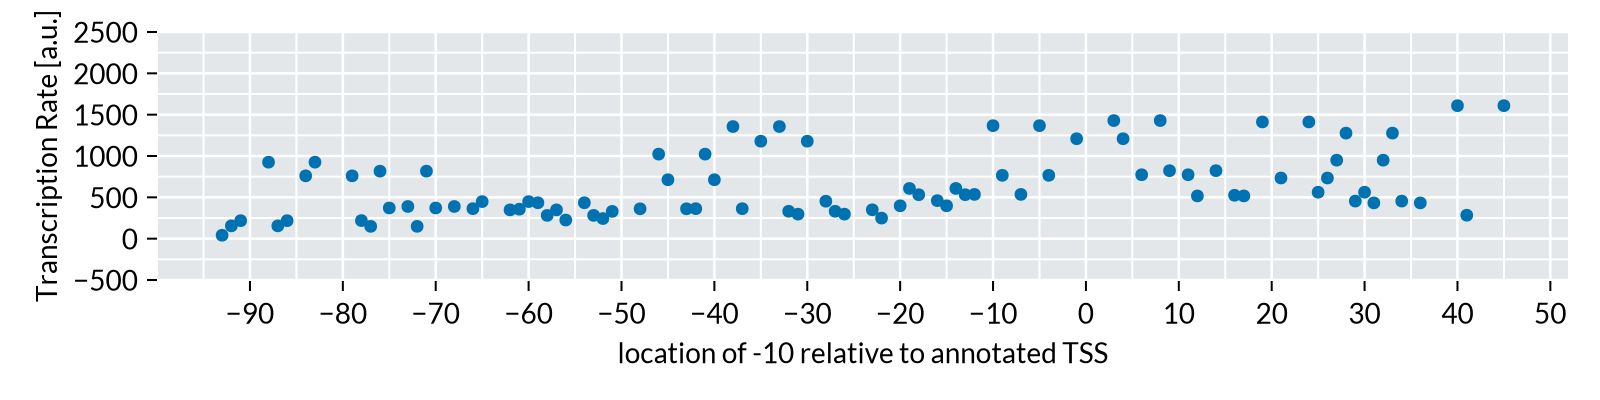

In [58]:
tss_df = DataFrame()

for m in collect(keys(r))
    append!(tss_df, DataFrame(r[m]))
end
sort!(tss_df, :dG_total)
tss_df.TSS = tss_df.TSS .- 140
tss_df.hex10_position = tss_df.hex10_position .- 140
cdf = combine(groupby(tss_df, :hex10_position), :Tx_rate => maximum)

fig = Figure(size=(800, 200))
ax = Axis(fig[1, 1], xticks=(-100:10:50), xlabel="location of -10 relative to annotated TSS", ylabel="Transcription Rate [a.u.]")

scatter!(ax, cdf.hex10_position, cdf.Tx_rate_maximum)
ylims!(-500, 2500)
save("xylF_min_ten_mut.pdf", fig)

fig

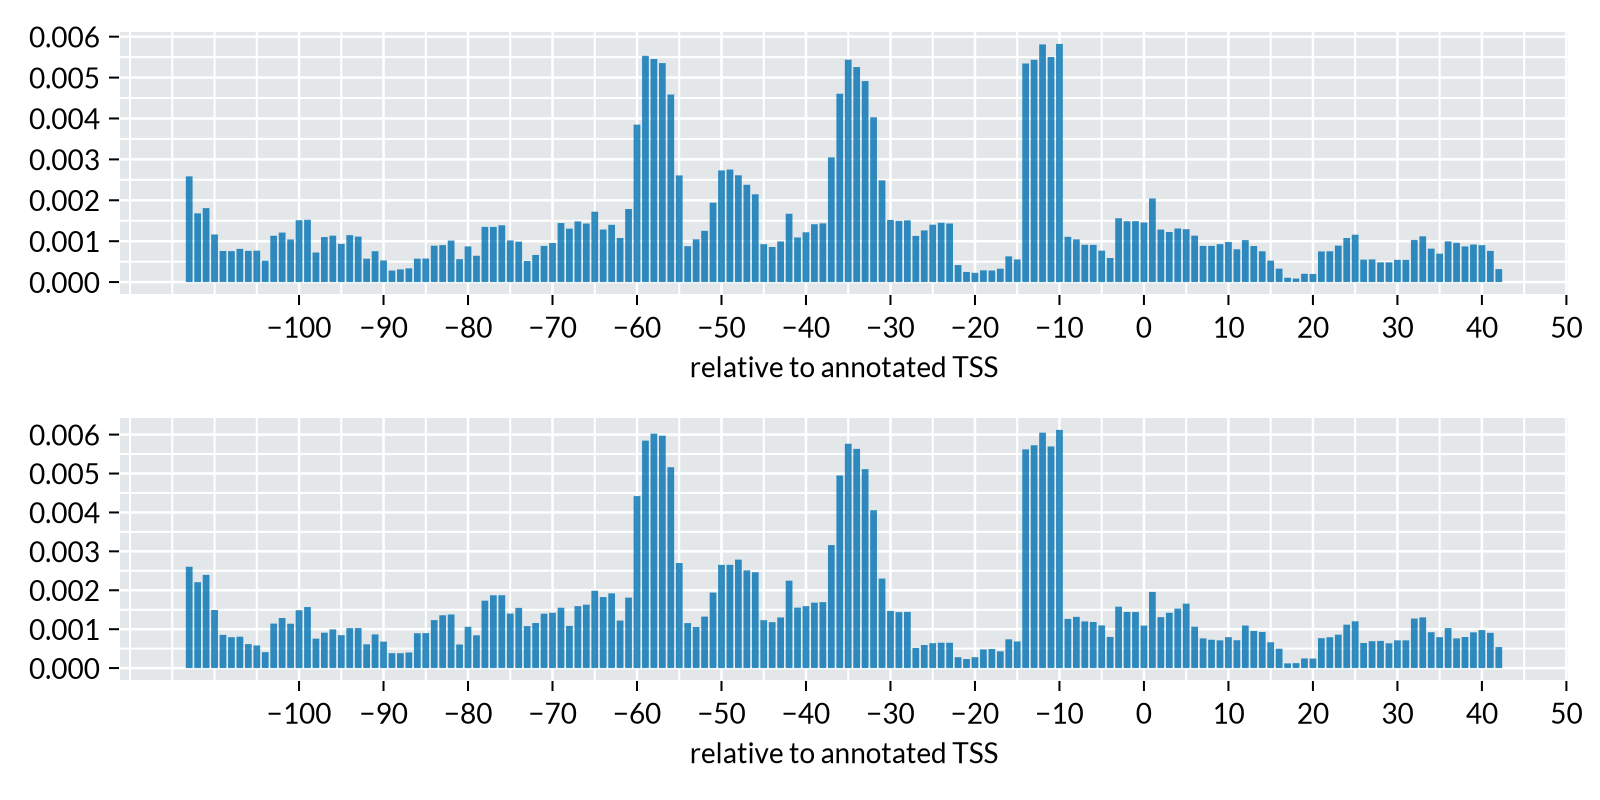

In [69]:
df = wgregseq.utils.get_dataset("2-2", "xylFp")
df_filt =  df[map(x -> collect(x)[91] != 'T', df.promoter), :]

x = wgregseq.footprints.mutual_information_mutation(df, vec=true)
x_filt = wgregseq.footprints.mutual_information_mutation(df_filt, vec=true)

fig = Figure(size=(800, 400))
ax1 = Axis(fig[1, 1], xticks=(-100:10:50), xlabel="relative to annotated TSS")
ax2 = Axis(fig[2, 1], xticks=(-100:10:50), xlabel="relative to annotated TSS")

barplot!(ax1, -113:42, [mean(x[i-2:i+2]) for i in 3:158])
barplot!(ax2, -113:42, [mean(x_filt[i-2:i+2]) for i in 3:158])

fig

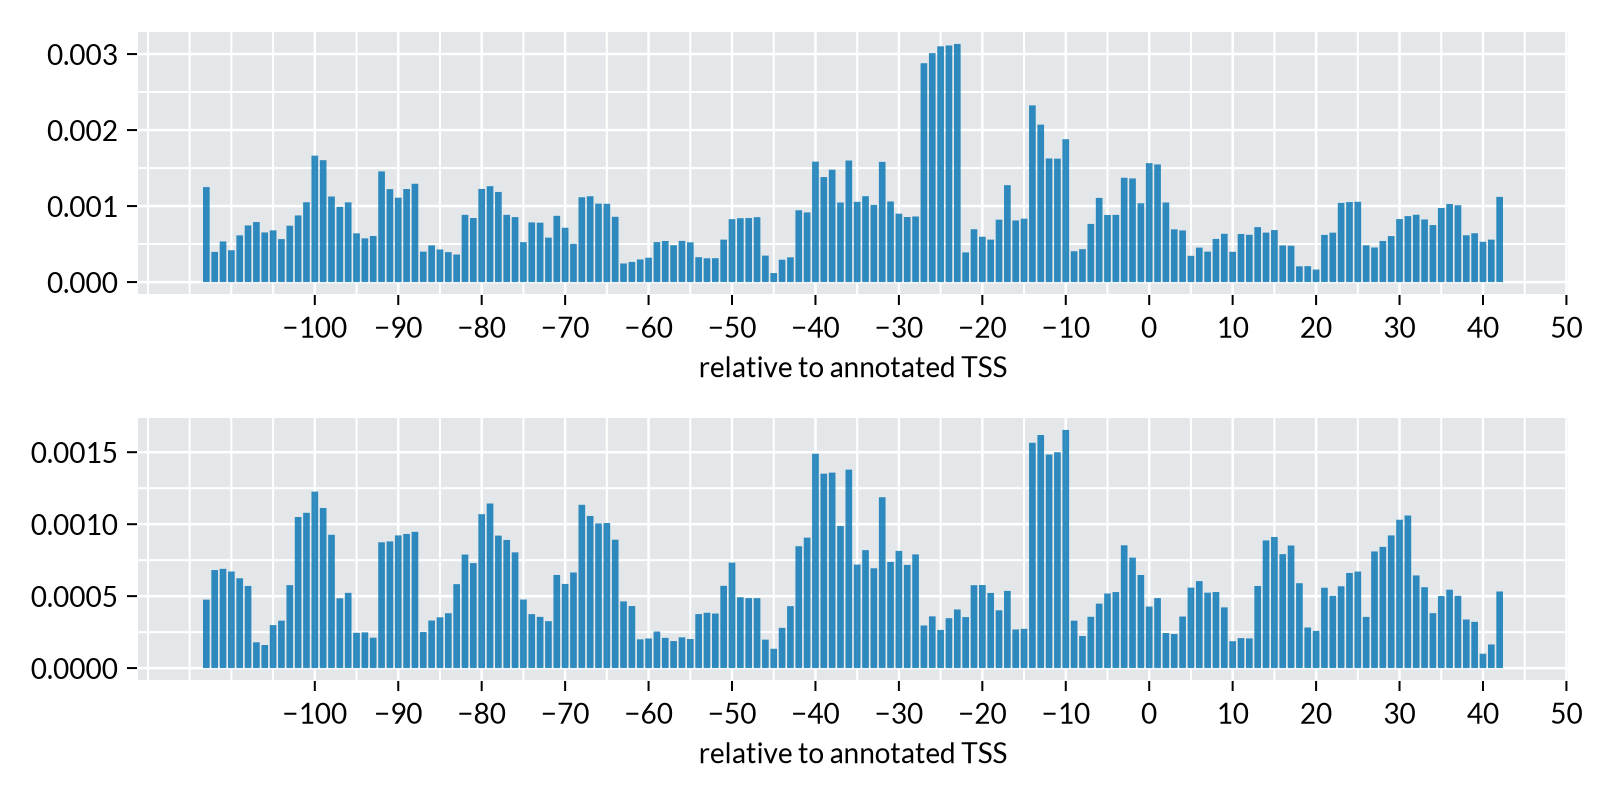

In [70]:
df = wgregseq.utils.get_dataset("1-2", "xylFp")
df_filt =  df[map(x -> collect(x)[91] != 'T', df.promoter), :]

x = wgregseq.footprints.mutual_information_mutation(df, vec=true)
x_filt = wgregseq.footprints.mutual_information_mutation(df_filt, vec=true)

fig = Figure(size=(800, 400))
ax1 = Axis(fig[1, 1], xticks=(-100:10:50), xlabel="relative to annotated TSS")
ax2 = Axis(fig[2, 1], xticks=(-100:10:50), xlabel="relative to annotated TSS")

barplot!(ax1, -113:42, [mean(x[i-2:i+2]) for i in 3:158])
barplot!(ax2, -113:42, [mean(x_filt[i-2:i+2]) for i in 3:158])

fig

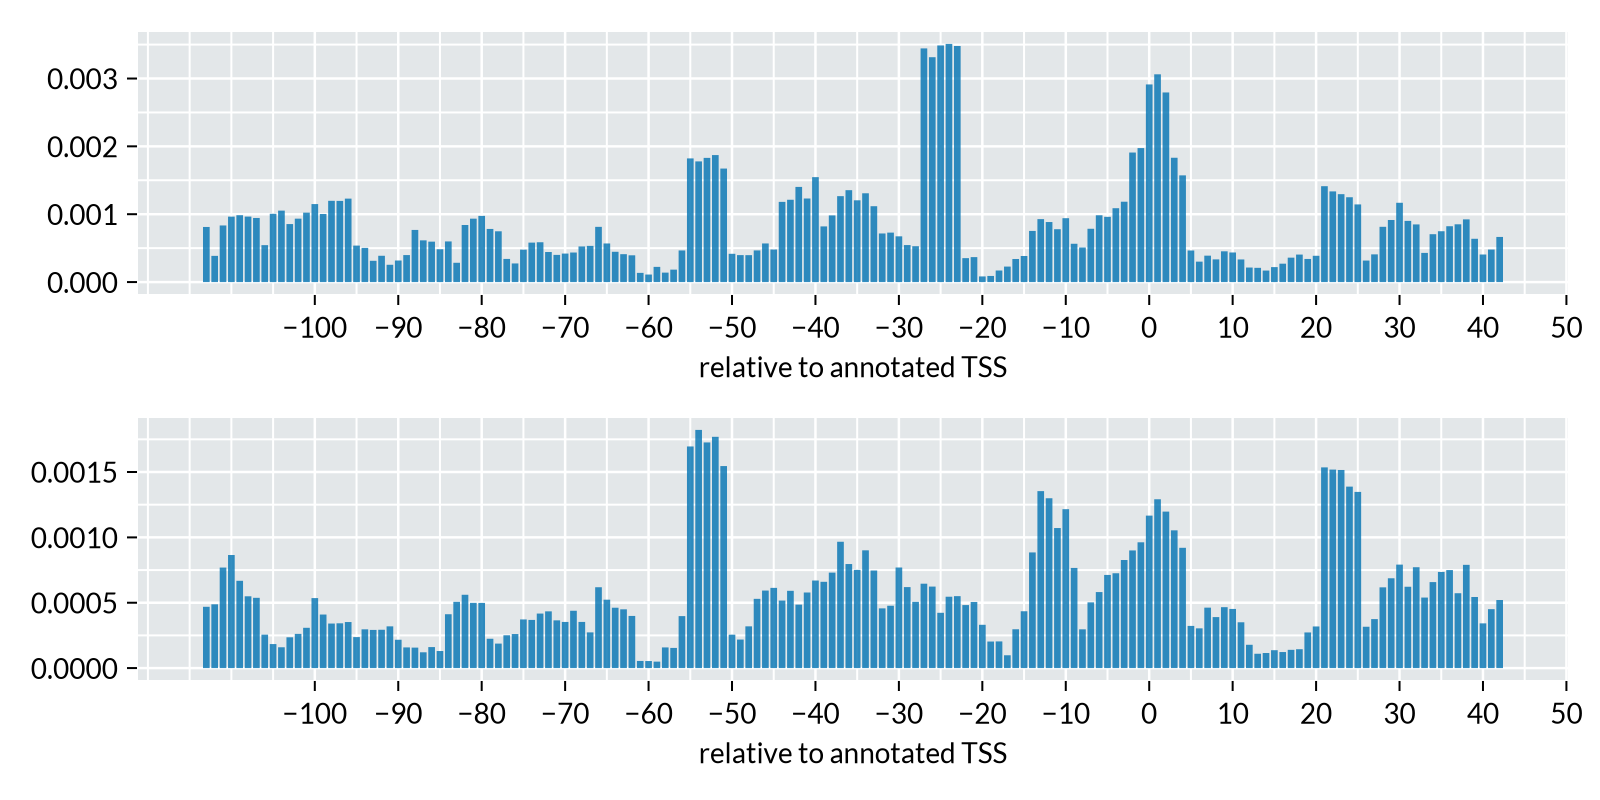

In [71]:
df = wgregseq.utils.get_dataset("1-1", "xylFp")
df_filt =  df[map(x -> collect(x)[91] != 'T', df.promoter), :]

x = wgregseq.footprints.mutual_information_mutation(df, vec=true)
x_filt = wgregseq.footprints.mutual_information_mutation(df_filt, vec=true)

fig = Figure(size=(800, 400))
ax1 = Axis(fig[1, 1], xticks=(-100:10:50), xlabel="relative to annotated TSS")
ax2 = Axis(fig[2, 1], xticks=(-100:10:50), xlabel="relative to annotated TSS")

barplot!(ax1, -113:42, [mean(x[i-2:i+2]) for i in 3:158])
barplot!(ax2, -113:42, [mean(x_filt[i-2:i+2]) for i in 3:158])

fig

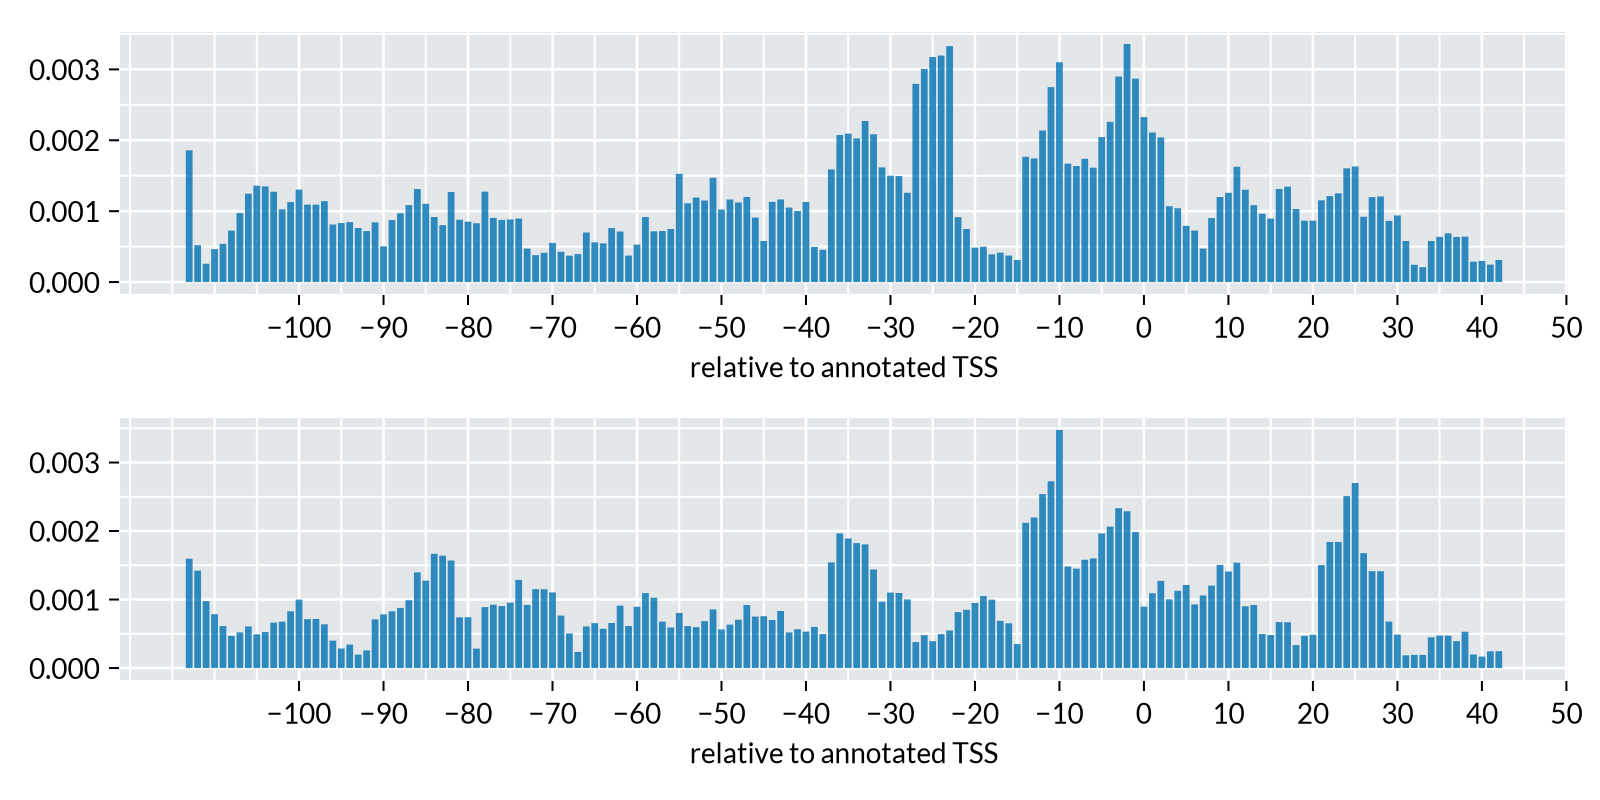

In [72]:
df = wgregseq.utils.get_dataset("3-2", "xylFp")
df_filt =  df[map(x -> collect(x)[91] != 'T', df.promoter), :]

x = wgregseq.footprints.mutual_information_mutation(df, vec=true)
x_filt = wgregseq.footprints.mutual_information_mutation(df_filt, vec=true)

fig = Figure(size=(800, 400))
ax1 = Axis(fig[1, 1], xticks=(-100:10:50), xlabel="relative to annotated TSS")
ax2 = Axis(fig[2, 1], xticks=(-100:10:50), xlabel="relative to annotated TSS")

barplot!(ax1, -113:42, [mean(x[i-2:i+2]) for i in 3:158])
barplot!(ax2, -113:42, [mean(x_filt[i-2:i+2]) for i in 3:158])

fig

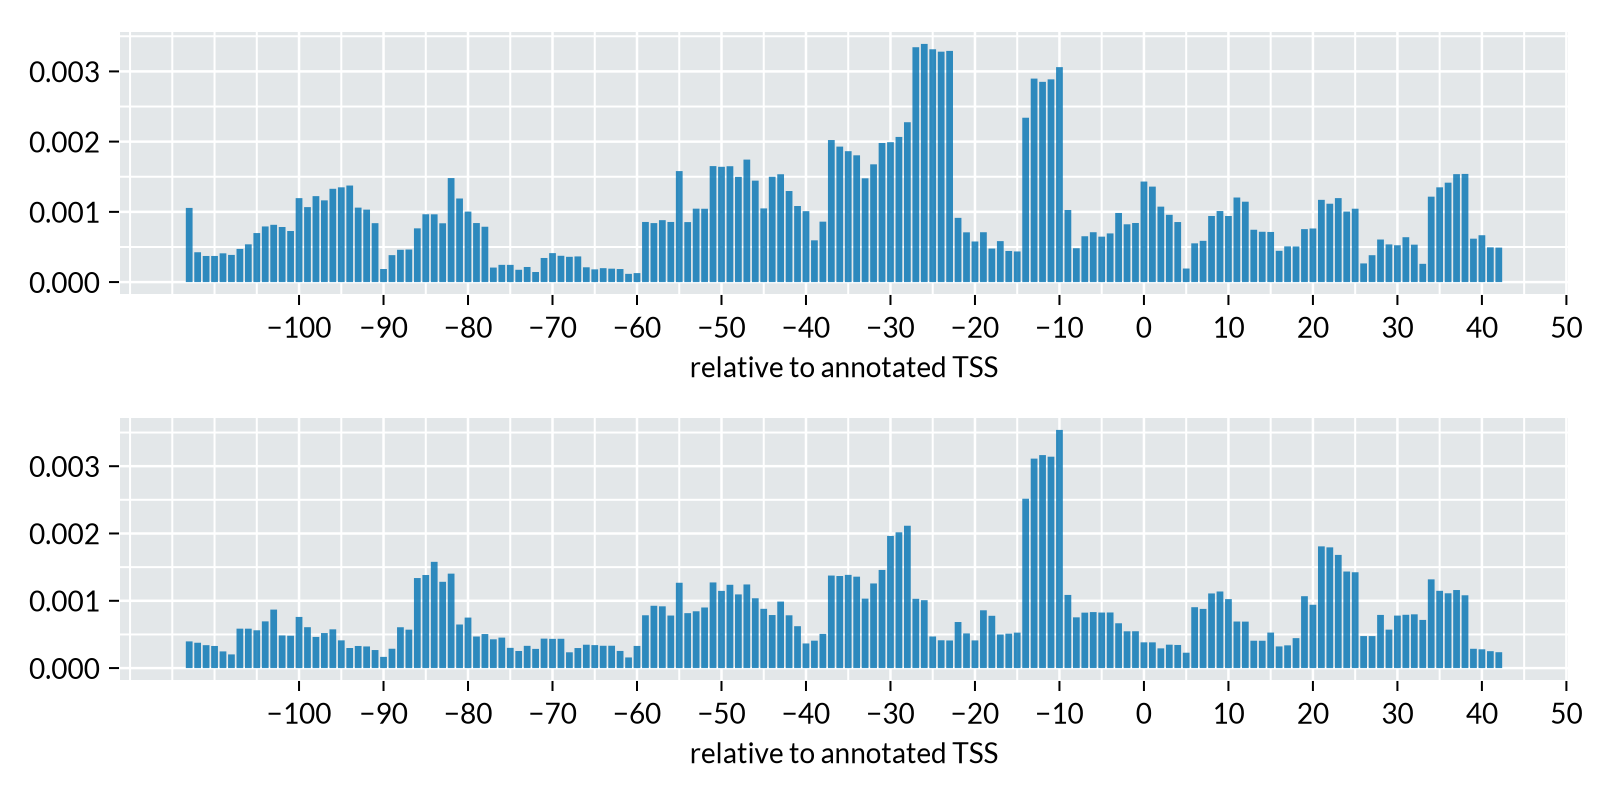

In [73]:
df = wgregseq.utils.get_dataset("3-1", "xylFp")
df_filt =  df[map(x -> collect(x)[91] != 'T', df.promoter), :]

x = wgregseq.footprints.mutual_information_mutation(df, vec=true)
x_filt = wgregseq.footprints.mutual_information_mutation(df_filt, vec=true)

fig = Figure(size=(800, 400))
ax1 = Axis(fig[1, 1], xticks=(-100:10:50), xlabel="relative to annotated TSS")
ax2 = Axis(fig[2, 1], xticks=(-100:10:50), xlabel="relative to annotated TSS")

barplot!(ax1, -113:42, [mean(x[i-2:i+2]) for i in 3:158])
barplot!(ax2, -113:42, [mean(x_filt[i-2:i+2]) for i in 3:158])

fig

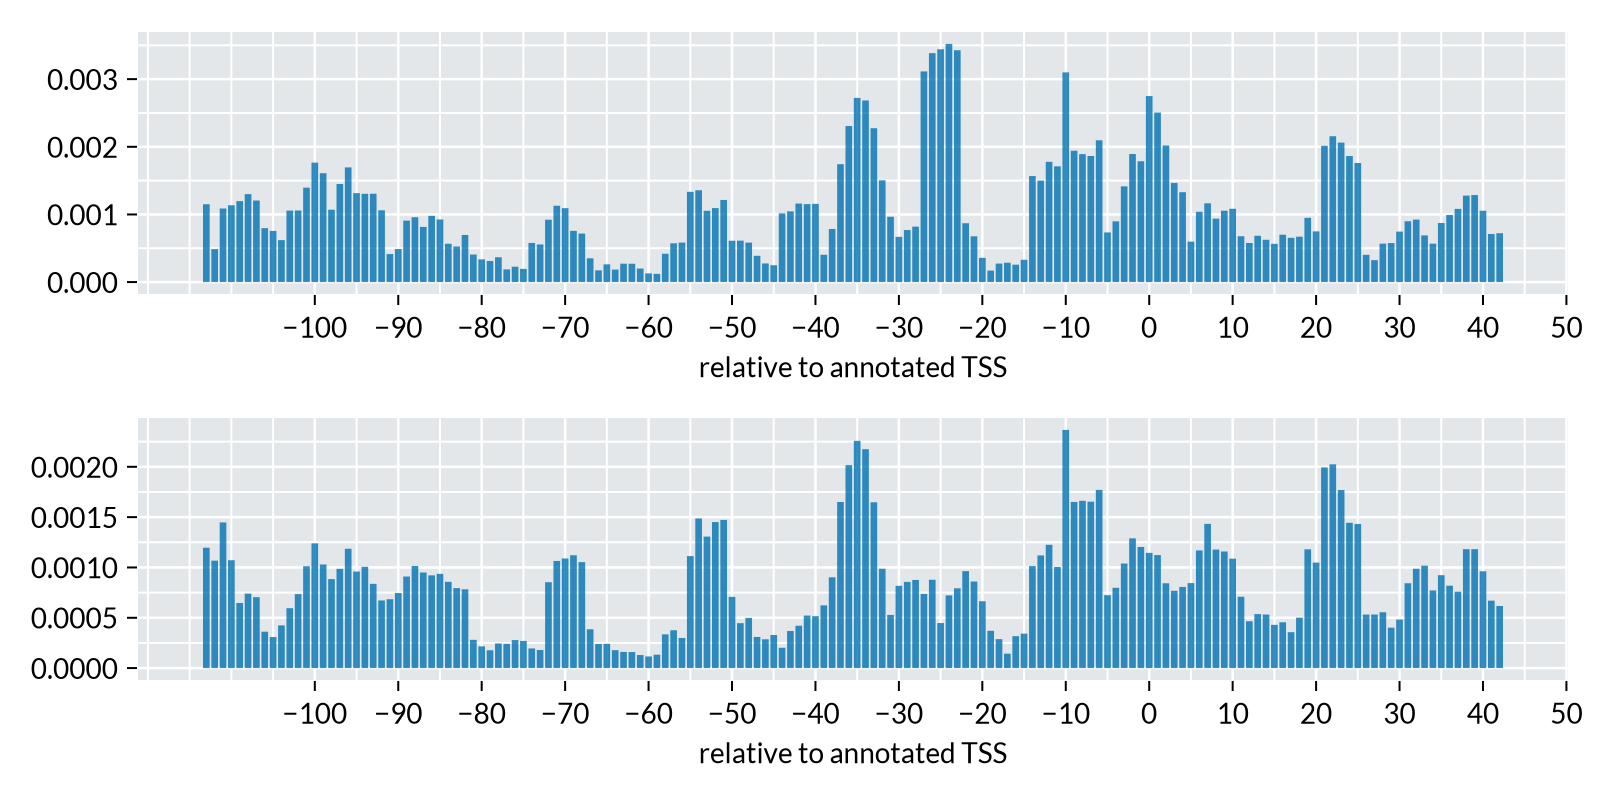

In [74]:
df = wgregseq.utils.get_dataset("4-3", "xylFp")
df_filt =  df[map(x -> collect(x)[91] != 'T', df.promoter), :]

x = wgregseq.footprints.mutual_information_mutation(df, vec=true)
x_filt = wgregseq.footprints.mutual_information_mutation(df_filt, vec=true)

fig = Figure(size=(800, 400))
ax1 = Axis(fig[1, 1], xticks=(-100:10:50), xlabel="relative to annotated TSS")
ax2 = Axis(fig[2, 1], xticks=(-100:10:50), xlabel="relative to annotated TSS")

barplot!(ax1, -113:42, [mean(x[i-2:i+2]) for i in 3:158])
barplot!(ax2, -113:42, [mean(x_filt[i-2:i+2]) for i in 3:158])

fig

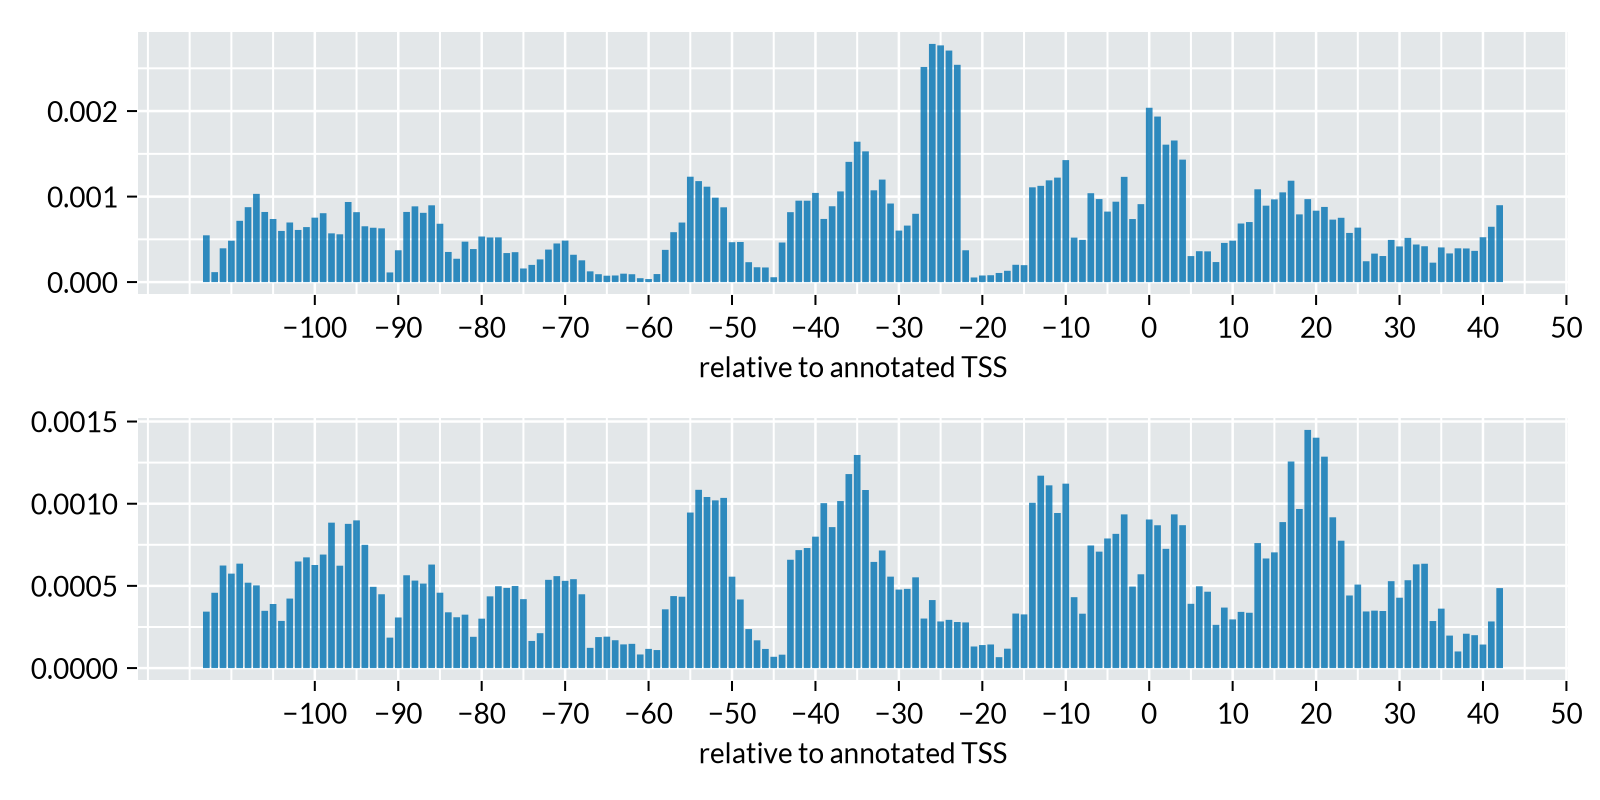

In [75]:
df = wgregseq.utils.get_dataset("13-3", "xylFp")
df_filt =  df[map(x -> collect(x)[91] != 'T', df.promoter), :]

x = wgregseq.footprints.mutual_information_mutation(df, vec=true)
x_filt = wgregseq.footprints.mutual_information_mutation(df_filt, vec=true)

fig = Figure(size=(800, 400))
ax1 = Axis(fig[1, 1], xticks=(-100:10:50), xlabel="relative to annotated TSS")
ax2 = Axis(fig[2, 1], xticks=(-100:10:50), xlabel="relative to annotated TSS")

barplot!(ax1, -113:42, [mean(x[i-2:i+2]) for i in 3:158])
barplot!(ax2, -113:42, [mean(x_filt[i-2:i+2]) for i in 3:158])

fig

## hdeA

In [49]:
df = wgregseq.utils.import_twist_order("../../../data/twist_orders/2022-02-15_twist_order.csv")
insertcols!(df, 4, :promoter_sequence => map(x -> x[27:186], df.sequence))
seq = df[df.promoter .== "hdeAp2", "promoter_sequence"][1] |> string

"TTCCTAATTGCAGTATCTGATGCATCTGTAACTCATTGTATTGAAATAAAAATATCTGATTTTGATATTTTCCATCAACATGACATATACAGAAAACCAGGTTATAACCTCAGTGTCGAAATTGATTCGTGACGGCTCTTTCACTTTATAGTTGAGGATA"

In [50]:
p = wgregseq.promoter_finder.Promoter_Calculator()
tss_list = []
int_to_base = Dict(1 => 'A', 2 => 'C', 3 => 'G', 4 => 'T')
ext_seq = uppercase("ACTAGATTCAGGGATAACATGGCACT") * seq * uppercase("GGGCCCagctgtcaccggatgtgctttcc")
r = p(ext_seq)["Forward_Predictions_per_TSS"]
_x = [(key, r[key]["dG_total"]) for key in keys(r) |> collect]
tss = _x[argmin([x[2] - 140 for x in _x])][1]
push!(tss_list, tss)

1-element Vector{Any}:
 102

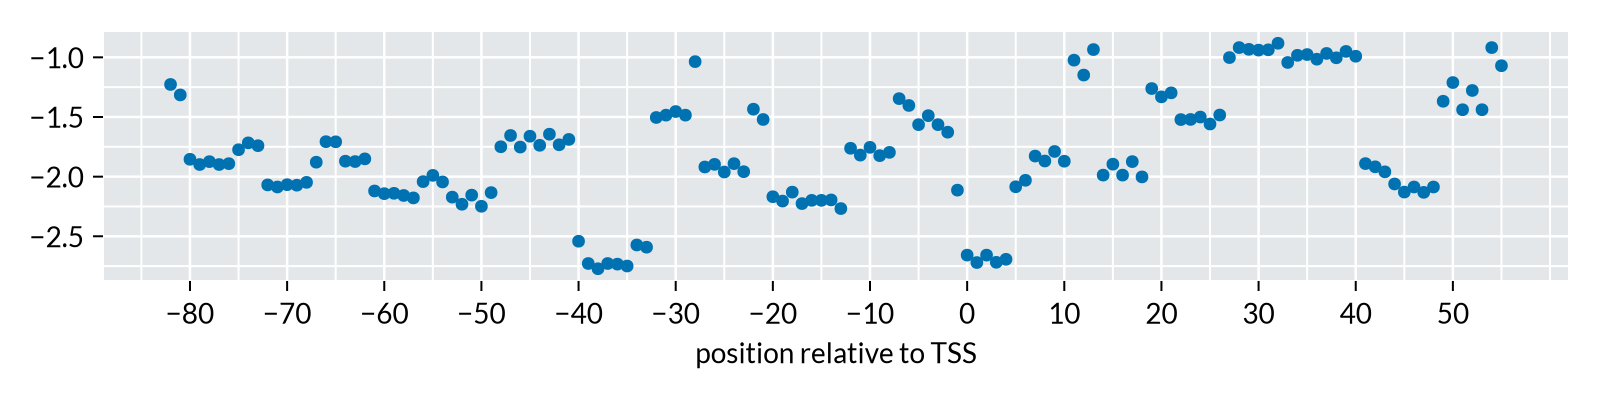

In [51]:
fig = Figure(size=(800, 200))
ax = Axis(fig[1, 1], xticks=(-100:10:50), xlabel="position relative to TSS")

scatter!(ax, [x[1]-140 for x in _x], [x[2] for x in _x])
fig

In [52]:
tss_df

276×23 DataFrame
 Row │ ITR                   TSS    Tx_rate   UP                        UP_pos ⋯
     │ LongSequ…             Int64  Float64   LongSequ…                 Int64  ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ TCGAAATTGATTCGTGACGG      1  7276.9    TCTGATTTTGATATTTTCCATCAA         ⋯
   2 │ TCGAAATTGATTCGTGACGG      1  7276.9    TCTGATTTTGATATTTTCCATCAA
   3 │ GAAATTGATTCGTGACGGCT      3  7254.49   TCTGATTTTGATATTTTCCATCAA
   4 │ GAAATTGATTCGTGACGGCT      3  7254.49   TCTGATTTTGATATTTTCCATCAA
   5 │ AAATTGATTCGTGACGGCTC      4  6960.78   TCTGATTTTGATATTTTCCATCAA         ⋯
   6 │ AAATTGATTCGTGACGGCTC      4  6960.78   TCTGATTTTGATATTTTCCATCAA
   7 │ GTCGAAATTGATTCGTGACG      0  6572.7    TCTGATTTTGATATTTTCCATCAA
   8 │ GTCGAAATTGATTCGTGACG      0  6572.7    TCTGATTTTGATATTTTCCATCAA
   9 │ CGAAATTGATTCGTGACGGC      2  6572.7    TCTGATTTTGATATTTTCCATCAA         ⋯
  10 │ CGAAATTGATTCGTGACGGC      2  6572.7    TCTGATTTTGATATTTTCCATCAA
  11 │ TTGACATATACAGAAAACCA    -35  3897.28   TCTGATGCATCTGTAACTCATTGT
  ⋮  │          ⋮              ⋮       ⋮                 ⋮                   ⋮ ⋱
 267 │ CTTTATAGTTGAGGATAGGG     29   191.739  TTGACATATACAGAAAACCAGGTT
 268 │ CTTTATAGTTGAGGATAGGG     29   191.739  TTGACATATACAGAAAACCAGGTT         ⋯
 269 │ CGTGACGGCTCTTTCACTTT     13   189.903  TATTTTCCATCAACTTGACATATA
 270 │ CGTGACGGCTCTTTCACTTT     13   189.903  TATTTTCCATCAACTTGACATATA
 271 │ CTGTCACCGGATGTGCTTTC     54   188.755  ACCTCAGTGTCGAAATTGATTCGT
 272 │ CTGTCACCGGATGTGCTTTC     54   188.755  ACCTCAGTGTCGAAATTGATTCGT         ⋯
 273 │ ACTTTATAGTTGAGGATAGG     28   187.182  TTGACATATACAGAAAACCAGGTT
 274 │ ACTTTATAGTTGAGGATAGG     28   187.182  TTGACATATACAGAAAACCAGGTT
 275 │ TATAGTTGAGGATAGGGCCC     32   177.895  TATACAGAAAACCAGGTTATAACC
 276 │ TATAGTTGAGGATAGGGCCC     32   177.895  TATACAGAAAACCAGGTTATAACC         ⋯
                                                 19 columns and 255 rows omitted

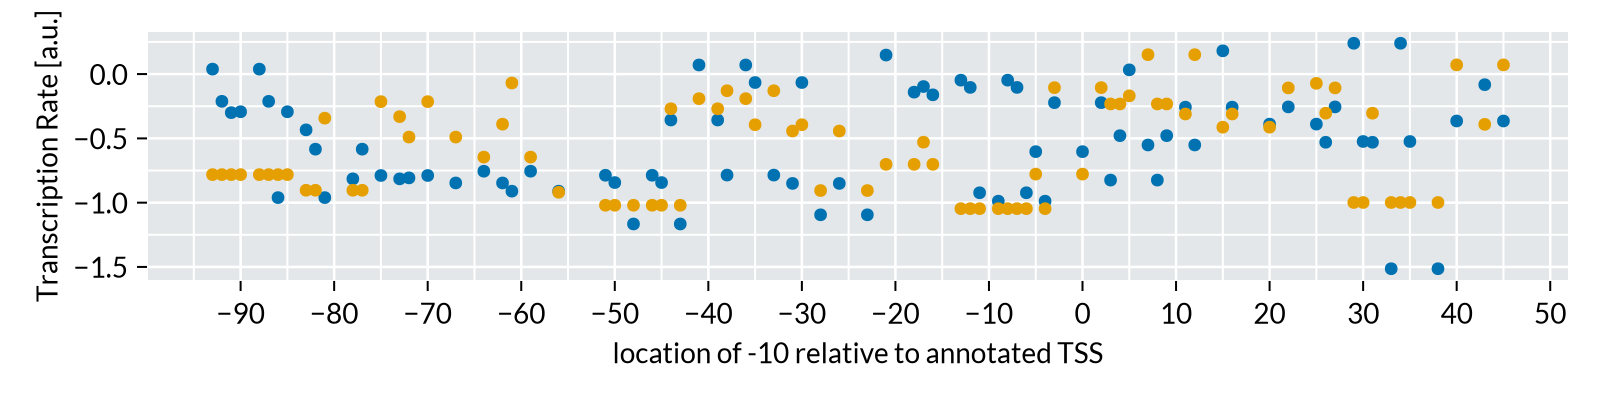

In [53]:
tss_df = DataFrame()

for m in collect(keys(r))
    append!(tss_df, DataFrame(r[m]))
end
sort!(tss_df, :dG_total)
tss_df.TSS = tss_df.TSS .- 140
tss_df.hex10_position = tss_df.hex10_position .- 140
cdf = combine(groupby(tss_df, :hex10_position), :dG_10 => minimum)
cdf35 = combine(groupby(tss_df, :hex10_position), :dG_35 => minimum)

fig = Figure(size=(800, 200))
ax = Axis(fig[1, 1], xticks=(-100:10:50), xlabel="location of -10 relative to annotated TSS", ylabel="Transcription Rate [a.u.]")

scatter!(ax, cdf.hex10_position, cdf.dG_10_minimum)
scatter!(ax, cdf.hex10_position, cdf35.dG_35_minimum)
#ylims!(-500, 2500)
#save("hdeA_min_ten_wt.pdf", fig)

fig

In [54]:
_seq = collect(seq)
_seq[80] = 'T'
_seq = join(_seq)

"TTCCTAATTGCAGTATCTGATGCATCTGTAACTCATTGTATTGAAATAAAAATATCTGATTTTGATATTTTCCATCAACTTGACATATACAGAAAACCAGGTTATAACCTCAGTGTCGAAATTGATTCGTGACGGCTCTTTCACTTTATAGTTGAGGATA"

In [55]:
ext_seq = uppercase("ACTAGATTCAGGGATAACATGGCACT") * _seq * uppercase("GGGCCCagctgtcaccggatgtgctttcc")
r = p(ext_seq)["Forward_Predictions_per_TSS"]
_x = [(key, r[key]["dG_total"]) for key in keys(r) |> collect]
tss = _x[argmin([x[2] - 140 for x in _x])][1]

141

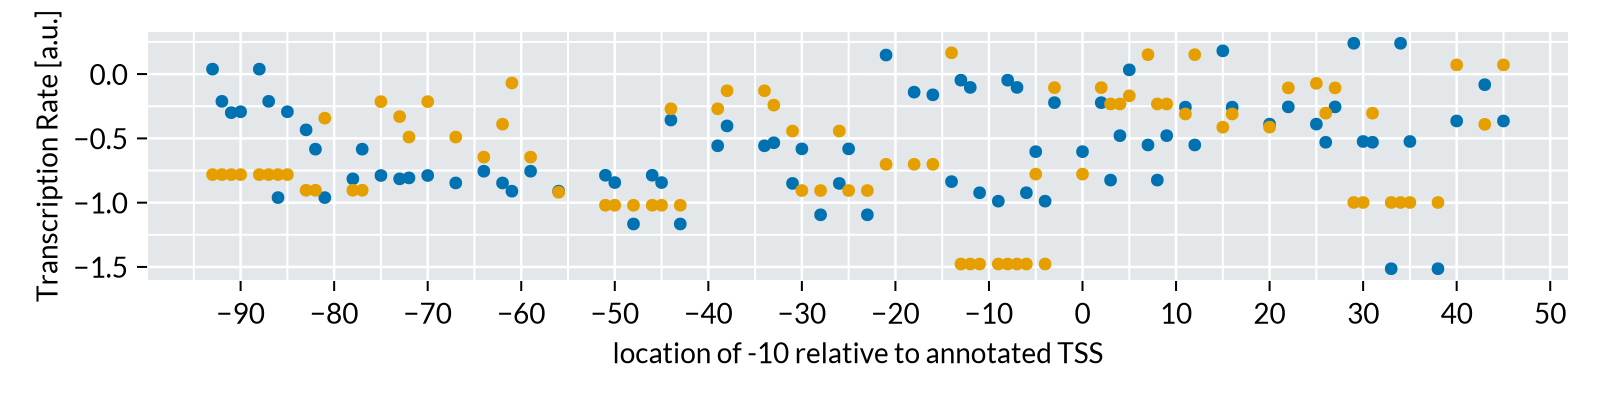

In [56]:
tss_df = DataFrame()

for m in collect(keys(r))
    append!(tss_df, DataFrame(r[m]))
end
sort!(tss_df, :dG_total)
tss_df.TSS = tss_df.TSS .- 140
tss_df.hex10_position = tss_df.hex10_position .- 140
cdf_m = combine(groupby(tss_df, :hex10_position), :dG_10 => minimum)
cdf35_m = combine(groupby(tss_df, :hex10_position), :dG_35 => minimum)

fig = Figure(size=(800, 200))
ax = Axis(fig[1, 1], xticks=(-100:10:50), xlabel="location of -10 relative to annotated TSS", ylabel="Transcription Rate [a.u.]")

scatter!(ax, cdf_m.hex10_position, cdf_m.dG_10_minimum)
scatter!(ax, cdf_m.hex10_position, cdf35_m.dG_35_minimum)
#ylims!(-500, 2500)
#save("hdeA_min_ten_wt.pdf", fig)

fig

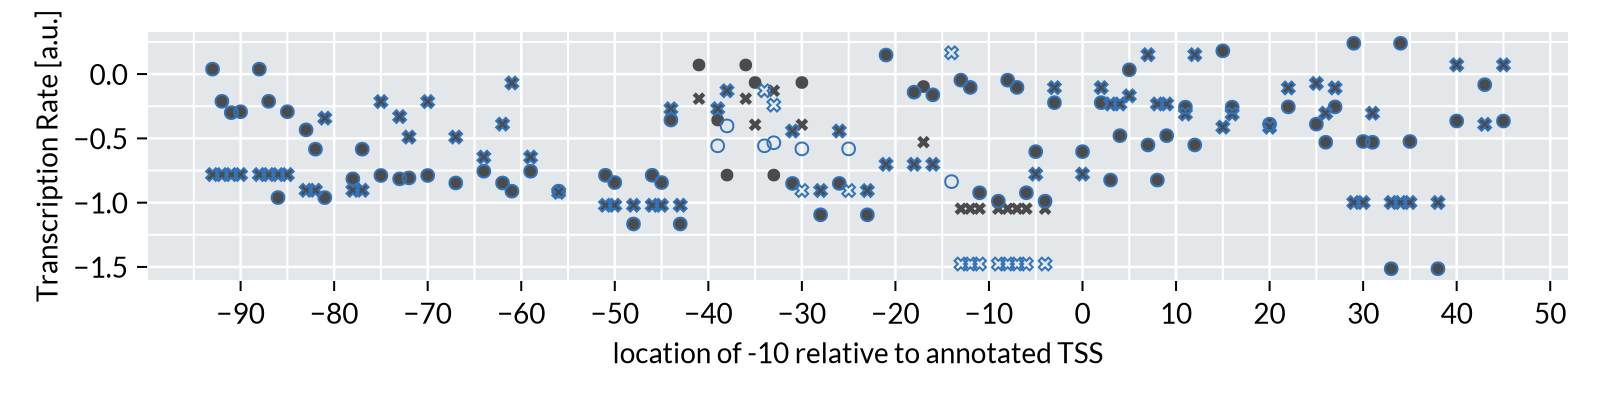

In [73]:
fig = Figure(size=(800, 200))
ax = Axis(fig[1, 1], xticks=(-100:10:50), xlabel="location of -10 relative to annotated TSS", ylabel="Transcription Rate [a.u.]")

scatter!(ax, cdf.hex10_position, cdf.dG_10_minimum, marker=:circle, color=palette[1])
scatter!(ax, cdf.hex10_position, cdf35.dG_35_minimum, marker=:xcross, color=palette[1])

scatter!(ax, cdf_m.hex10_position, cdf_m.dG_10_minimum, marker=:circle, strokecolor=palette[2], strokewidth=1, color=("white", 0))
scatter!(ax, cdf_m.hex10_position, cdf35_m.dG_35_minimum, marker=:xcross, strokecolor=palette[2], strokewidth=1, color=("white", 0))

fig

## icdC

In [14]:
df = wgregseq.utils.import_twist_order("../../../data/twist_orders/2022-02-15_twist_order.csv")
insertcols!(df, 4, :promoter_sequence => map(x -> x[27:186], df.sequence))
seq = df[df.promoter .== "icdC_predicted", "promoter_sequence"][1] |> string

"TCCGAATTGCCATAGAGAATTGCACTATAGTAAAAATGCAAAAGAACTAATCGAGATGCTTTACGTTAATATAAACCGATTACAGAAATAAAATTATTTATTAAAGTCACATTTAAGACGTAATACCCTACAGGGTAAAAATTTTCTCTGATCTTAACTT"

In [15]:
p = wgregseq.promoter_finder.Promoter_Calculator()
tss_list = []
int_to_base = Dict(1 => 'A', 2 => 'C', 3 => 'G', 4 => 'T')
ext_seq = uppercase("ACTAGATTCAGGGATAACATGGCACT") * seq * uppercase("GGGCCCagctgtcaccggatgtgctttcc")
r = p(ext_seq)["Forward_Predictions_per_TSS"]
_x = [(key, r[key]["dG_total"]) for key in keys(r) |> collect]
tss = _x[argmin([x[2] - 140 for x in _x])][1]
push!(tss_list, tss)

1-element Vector{Any}:
 140

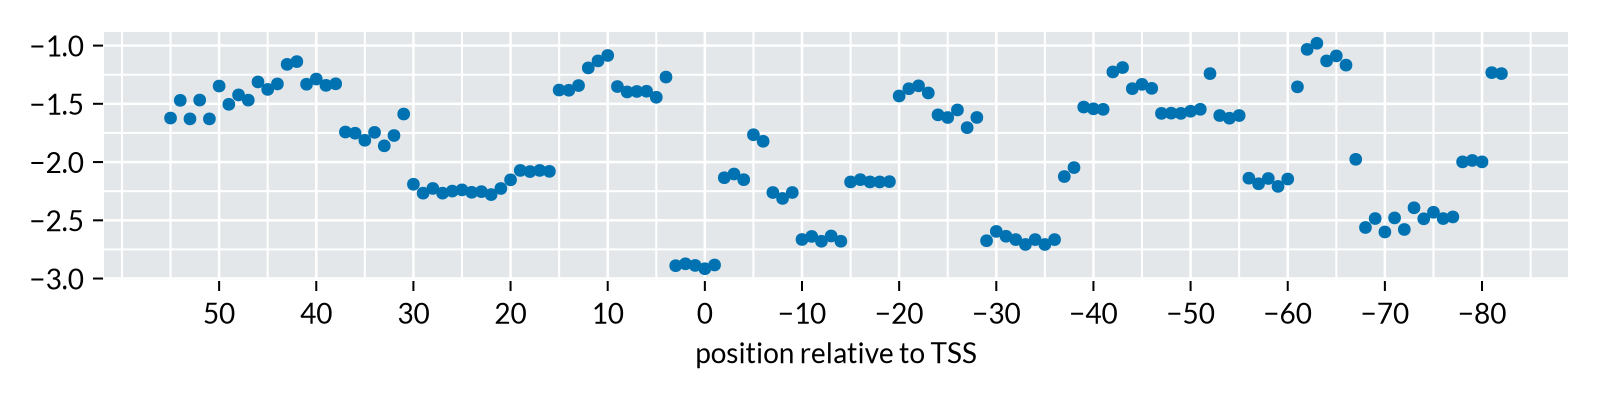

In [16]:
fig = Figure(size=(800, 200))
ax = Axis(fig[1, 1], xticks=(-100:10:50), xlabel="position relative to TSS")

scatter!(ax, [x[1]-140 for x in _x], [x[2] for x in _x])
ax.xreversed = true
fig

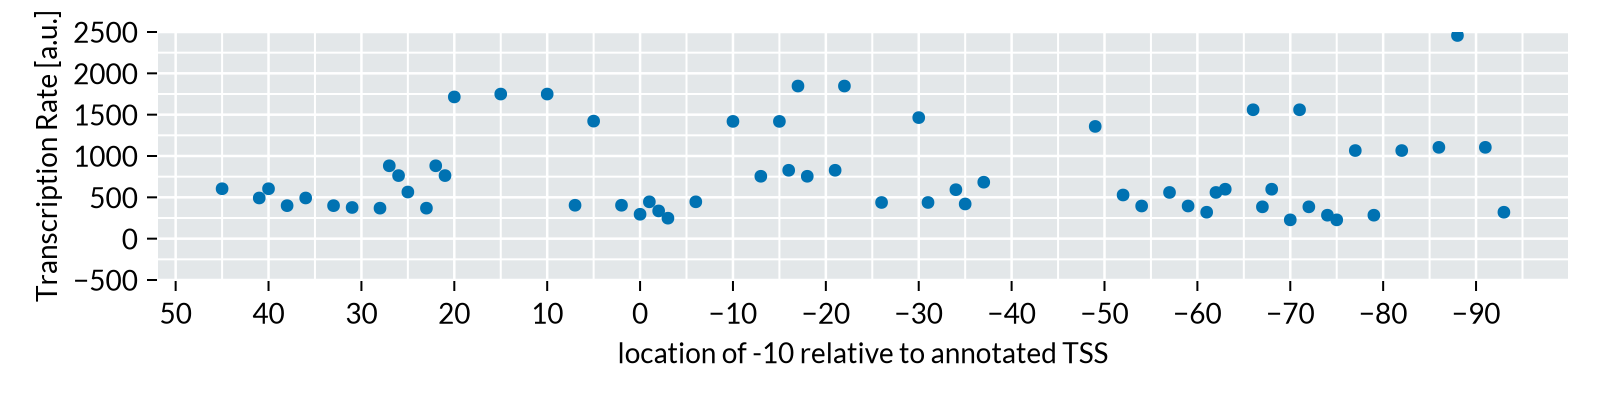

In [17]:
tss_df = DataFrame()

for m in collect(keys(r))
    append!(tss_df, DataFrame(r[m]))
end
sort!(tss_df, :dG_total)
tss_df.TSS = tss_df.TSS .- 140
tss_df.hex10_position = tss_df.hex10_position .- 140
cdf = combine(groupby(tss_df, :hex10_position), :Tx_rate => maximum)

fig = Figure(size=(800, 200))
ax = Axis(fig[1, 1], xticks=(-100:10:50), xlabel="location of -10 relative to annotated TSS", ylabel="Transcription Rate [a.u.]")
ax.xreversed = true
scatter!(ax, cdf.hex10_position, cdf.Tx_rate_maximum)
ylims!(-500, 2500)
#save("araB_min_ten_wt.pdf", fig)

fig

## lppp2

In [18]:
df = wgregseq.utils.import_twist_order("../../../data/twist_orders/2022-02-15_twist_order.csv")
insertcols!(df, 4, :promoter_sequence => map(x -> x[27:186], df.sequence))
seq = df[df.promoter .== "lppp2", "promoter_sequence"][1] |> string

"GAAGCAATAAAAAATCAAATCGGATTTCACTATATAATCTCACTTTATCTAAGATGAATCCGATGGAAGCATCCTGTTTTCTCTCAATTTTTTTATCTAAAACCCAGCGTTCGATGCTTCTTTGAGCGAACGATCAAAAATAAGTGCCTTCCCATCAAAA"

In [19]:
p = wgregseq.promoter_finder.Promoter_Calculator()
tss_list = []
int_to_base = Dict(1 => 'A', 2 => 'C', 3 => 'G', 4 => 'T')
ext_seq = uppercase("ACTAGATTCAGGGATAACATGGCACT") * seq * uppercase("GGGCCCagctgtcaccggatgtgctttcc")
r = p(ext_seq)["Forward_Predictions_per_TSS"]
_x = [(key, r[key]["dG_total"]) for key in keys(r) |> collect]
tss = _x[argmin([x[2] - 140 for x in _x])][1]
push!(tss_list, tss)

1-element Vector{Any}:
 70

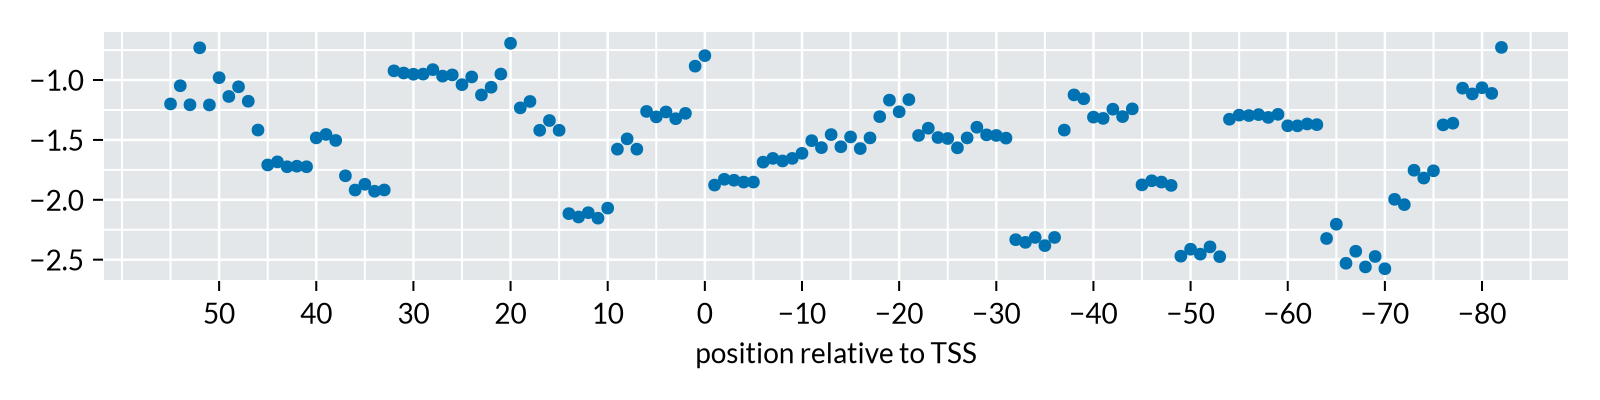

In [20]:
fig = Figure(size=(800, 200))
ax = Axis(fig[1, 1], xticks=(-100:10:50), xlabel="position relative to TSS")

scatter!(ax, [x[1]-140 for x in _x], [x[2] for x in _x])
ax.xreversed = true
fig

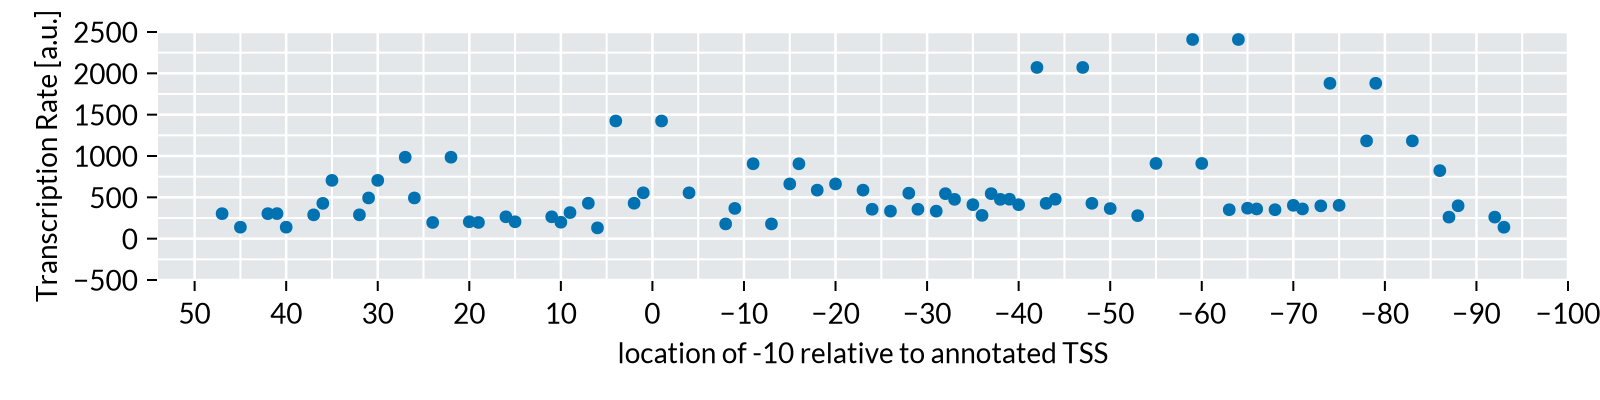

In [21]:
tss_df = DataFrame()

for m in collect(keys(r))
    append!(tss_df, DataFrame(r[m]))
end
sort!(tss_df, :dG_total)
tss_df.TSS = tss_df.TSS .- 140
tss_df.hex10_position = tss_df.hex10_position .- 140
cdf = combine(groupby(tss_df, :hex10_position), :Tx_rate => maximum)

fig = Figure(size=(800, 200))
ax = Axis(fig[1, 1], xticks=(-100:10:50), xlabel="location of -10 relative to annotated TSS", ylabel="Transcription Rate [a.u.]")
ax.xreversed = true
scatter!(ax, cdf.hex10_position, cdf.Tx_rate_maximum)
ylims!(-500, 2500)
#save("araB_min_ten_wt.pdf", fig)

fig

## mprA

In [22]:
df = wgregseq.utils.import_twist_order("../../../data/twist_orders/2022-02-15_twist_order.csv")
insertcols!(df, 4, :promoter_sequence => map(x -> x[27:186], df.sequence))
seq = df[df.promoter .== "mprAp", "promoter_sequence"][1] |> string

"GTGCGCTGGCCTATGGGCTCGCCTGGAAAGTGATGGCGATTATATAACCCACAAGAATCATTTTTCTAAAACAATACATTTACTTTATTTGTCACTGTCGTTACTATATCGGCTGAAATTAATGAGGTCATACCCAAATGGATAGTTCGTTTACGCCCAT"

In [23]:
p = wgregseq.promoter_finder.Promoter_Calculator()
tss_list = []
int_to_base = Dict(1 => 'A', 2 => 'C', 3 => 'G', 4 => 'T')
ext_seq = uppercase("ACTAGATTCAGGGATAACATGGCACT") * seq * uppercase("GGGCCCagctgtcaccggatgtgctttcc")
r = p(ext_seq)["Forward_Predictions_per_TSS"]
_x = [(key, r[key]["dG_total"]) for key in keys(r) |> collect]
tss = _x[argmin([x[2] - 140 for x in _x])][1]
push!(tss_list, tss)

1-element Vector{Any}:
 140

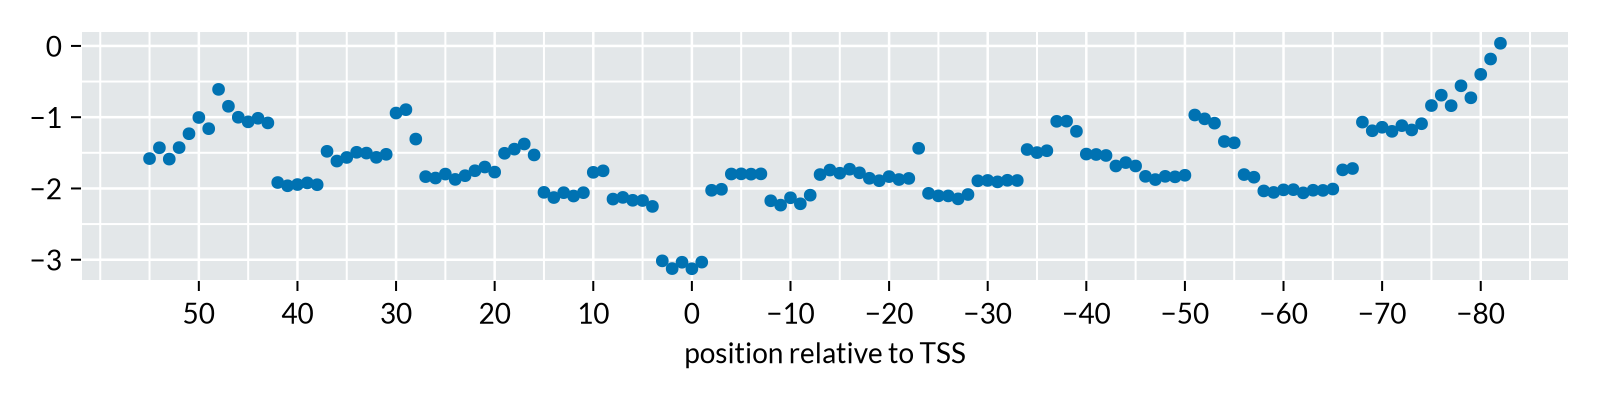

In [24]:
fig = Figure(size=(800, 200))
ax = Axis(fig[1, 1], xticks=(-100:10:50), xlabel="position relative to TSS")

scatter!(ax, [x[1]-140 for x in _x], [x[2] for x in _x])
ax.xreversed = true
fig

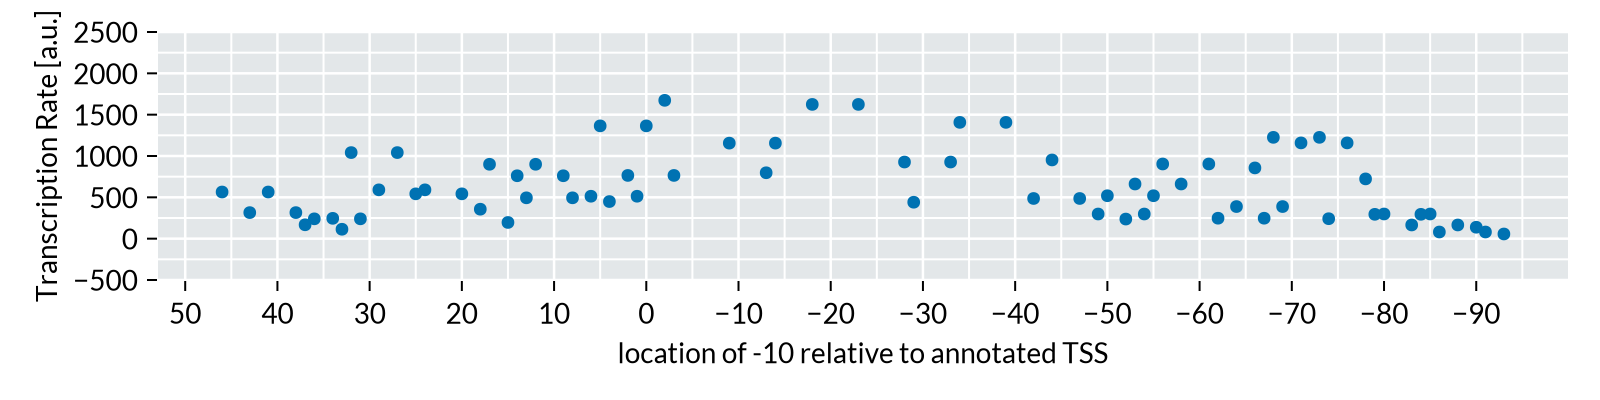

In [25]:
tss_df = DataFrame()

for m in collect(keys(r))
    append!(tss_df, DataFrame(r[m]))
end
sort!(tss_df, :dG_total)
tss_df.TSS = tss_df.TSS .- 140
tss_df.hex10_position = tss_df.hex10_position .- 140
cdf = combine(groupby(tss_df, :hex10_position), :Tx_rate => maximum)

fig = Figure(size=(800, 200))
ax = Axis(fig[1, 1], xticks=(-100:10:50), xlabel="location of -10 relative to annotated TSS", ylabel="Transcription Rate [a.u.]")
ax.xreversed = true
scatter!(ax, cdf.hex10_position, cdf.Tx_rate_maximum)
ylims!(-500, 2500)
#save("araB_min_ten_wt.pdf", fig)

fig

## rcsD

In [26]:
df = wgregseq.utils.import_twist_order("../../../data/twist_orders/2022-02-15_twist_order.csv")
insertcols!(df, 4, :promoter_sequence => map(x -> x[27:186], df.sequence))
seq = df[df.promoter .== "rcsDp", "promoter_sequence"][1] |> string

"TGGCGCTTGTACATCTATTTCCCCCAATGCAGGATGATAAATATCACGGGAGAATAGAGAATCATCAATCAGGTAAGAGTCTGGAATTTCACACTGTACCCTTTATACTGCCCTATCACTTCGCGAAGTTTTAACAGGTCATAAACACGAATGCGTCAGA"

In [27]:
p = wgregseq.promoter_finder.Promoter_Calculator()
tss_list = []
int_to_base = Dict(1 => 'A', 2 => 'C', 3 => 'G', 4 => 'T')
ext_seq = uppercase("ACTAGATTCAGGGATAACATGGCACT") * seq * uppercase("GGGCCCagctgtcaccggatgtgctttcc")
r = p(ext_seq)["Forward_Predictions_per_TSS"]
_x = [(key, r[key]["dG_total"]) for key in keys(r) |> collect]
tss = _x[argmin([x[2] - 140 for x in _x])][1]
push!(tss_list, tss)

1-element Vector{Any}:
 144

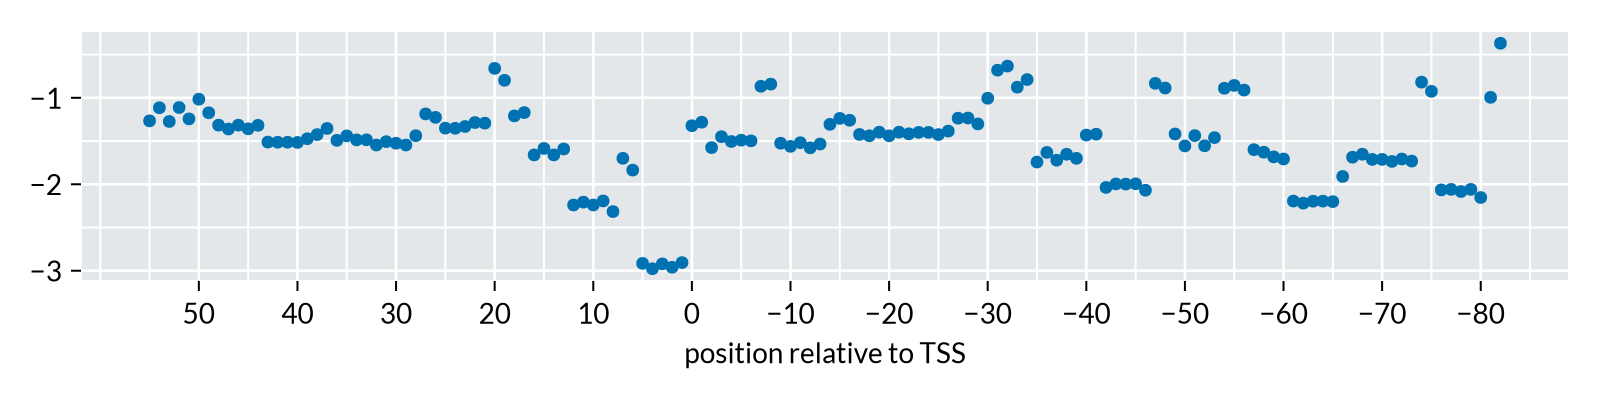

In [28]:
fig = Figure(size=(800, 200))
ax = Axis(fig[1, 1], xticks=(-100:10:50), xlabel="position relative to TSS")

scatter!(ax, [x[1]-140 for x in _x], [x[2] for x in _x])
ax.xreversed = true
fig

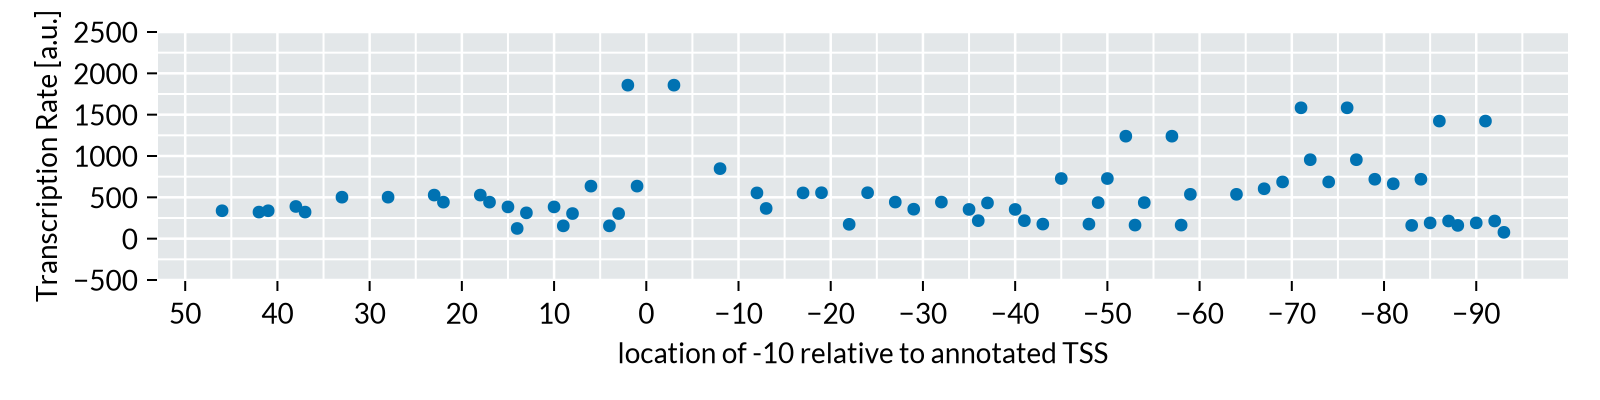

In [29]:
tss_df = DataFrame()

for m in collect(keys(r))
    append!(tss_df, DataFrame(r[m]))
end
sort!(tss_df, :dG_total)
tss_df.TSS = tss_df.TSS .- 140
tss_df.hex10_position = tss_df.hex10_position .- 140
cdf = combine(groupby(tss_df, :hex10_position), :Tx_rate => maximum)

fig = Figure(size=(800, 200))
ax = Axis(fig[1, 1], xticks=(-100:10:50), xlabel="location of -10 relative to annotated TSS", ylabel="Transcription Rate [a.u.]")
ax.xreversed = true
scatter!(ax, cdf.hex10_position, cdf.Tx_rate_maximum)
ylims!(-500, 2500)
#save("araB_min_ten_wt.pdf", fig)

fig

## xylA

In [47]:
df = wgregseq.utils.import_twist_order("../../../data/twist_orders/2022-02-15_twist_order.csv")
insertcols!(df, 4, :promoter_sequence => map(x -> x[27:186], df.sequence))
seq = df[df.promoter .== "xylAp", "promoter_sequence"][1] |> string

"CCAGTTTCATCATTCCATTTTATTTTGCGAGCGAGCGCACACTTGTGAATTATCTCAATAGCAGTGTGAAATAACATAATTGAGCAACTGAAAGGGAGTGCCCAATATTACGACATCATCCATCACCCGCGGCATTACCTGATTATGGAGTTCAATATGC"

In [48]:
p = wgregseq.promoter_finder.Promoter_Calculator()
tss_list = []
int_to_base = Dict(1 => 'A', 2 => 'C', 3 => 'G', 4 => 'T')
ext_seq = uppercase("ACTAGATTCAGGGATAACATGGCACT") * seq * uppercase("GGGCCCagctgtcaccggatgtgctttcc")
r = p(ext_seq)["Forward_Predictions_per_TSS"]
_x = [(key, r[key]["dG_total"]) for key in keys(r) |> collect]
tss = _x[argmin([x[2] - 140 for x in _x])][1]
push!(tss_list, tss)

1-element Vector{Any}:
 86

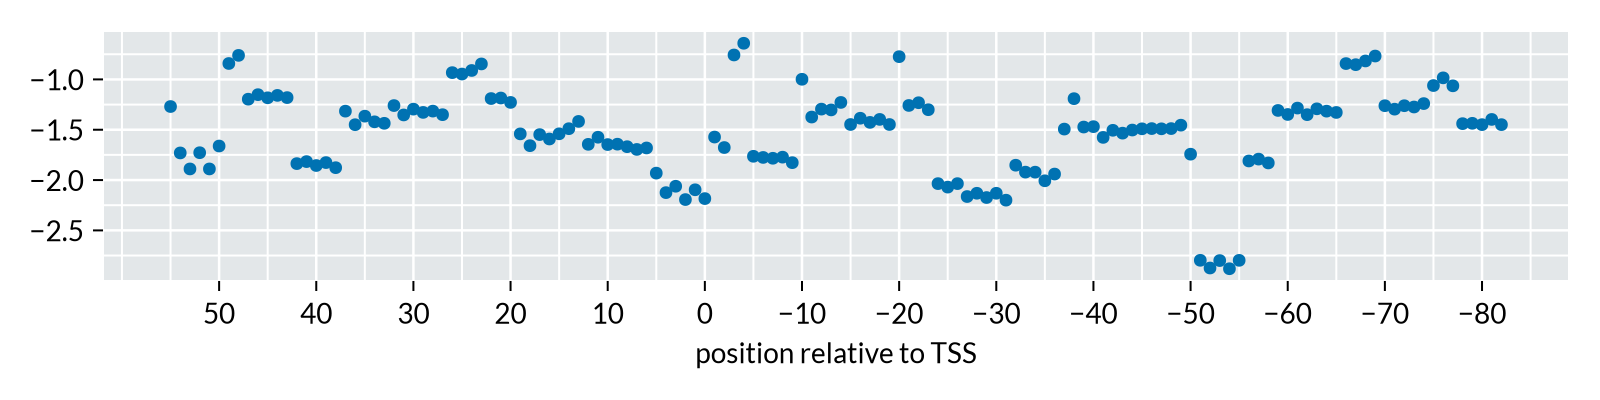

In [49]:
fig = Figure(size=(800, 200))
ax = Axis(fig[1, 1], xticks=(-100:10:50), xlabel="position relative to TSS")

scatter!(ax, [x[1]-140 for x in _x], [x[2] for x in _x])
ax.xreversed = true
fig

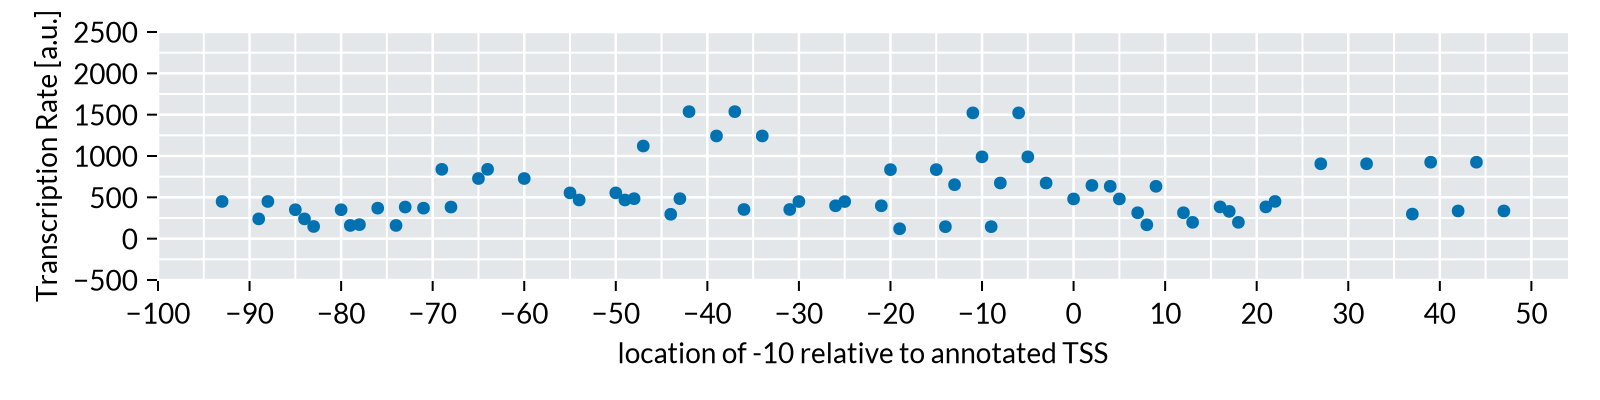

In [52]:
tss_df = DataFrame()

for m in collect(keys(r))
    append!(tss_df, DataFrame(r[m]))
end
sort!(tss_df, :dG_total)
tss_df.TSS = tss_df.TSS .- 140
tss_df.hex10_position = tss_df.hex10_position .- 140
cdf = combine(groupby(tss_df, :hex10_position), :Tx_rate => maximum)

fig = Figure(size=(800, 200))
ax = Axis(fig[1, 1], xticks=(-100:10:50), xlabel="location of -10 relative to annotated TSS", ylabel="Transcription Rate [a.u.]")

scatter!(ax, cdf.hex10_position, cdf.Tx_rate_maximum)
ylims!(-500, 2500)
#save("araB_min_ten_wt.pdf", fig)

fig

In [64]:
_seq = collect(seq)
_seq[48]

'A': ASCII/Unicode U+0041 (category Lu: Letter, uppercase)

In [65]:
_seq = collect(seq)
_seq[48] = 'T'
_seq = join(_seq)

"CCAGTTTCATCATTCCATTTTATTTTGCGAGCGAGCGCACACTTGTGTATTATCTCAATAGCAGTGTGAAATAACATAATTGAGCAACTGAAAGGGAGTGCCCAATATTACGACATCATCCATCACCCGCGGCATTACCTGATTATGGAGTTCAATATGC"

In [66]:
ext_seq = uppercase("ACTAGATTCAGGGATAACATGGCACT") * _seq * uppercase("GGGCCCagctgtcaccggatgtgctttcc")
r = p(ext_seq)["Forward_Predictions_per_TSS"]
_x = [(key, r[key]["dG_total"]) for key in keys(r) |> collect]
tss = _x[argmin([x[2] - 140 for x in _x])][1]

86

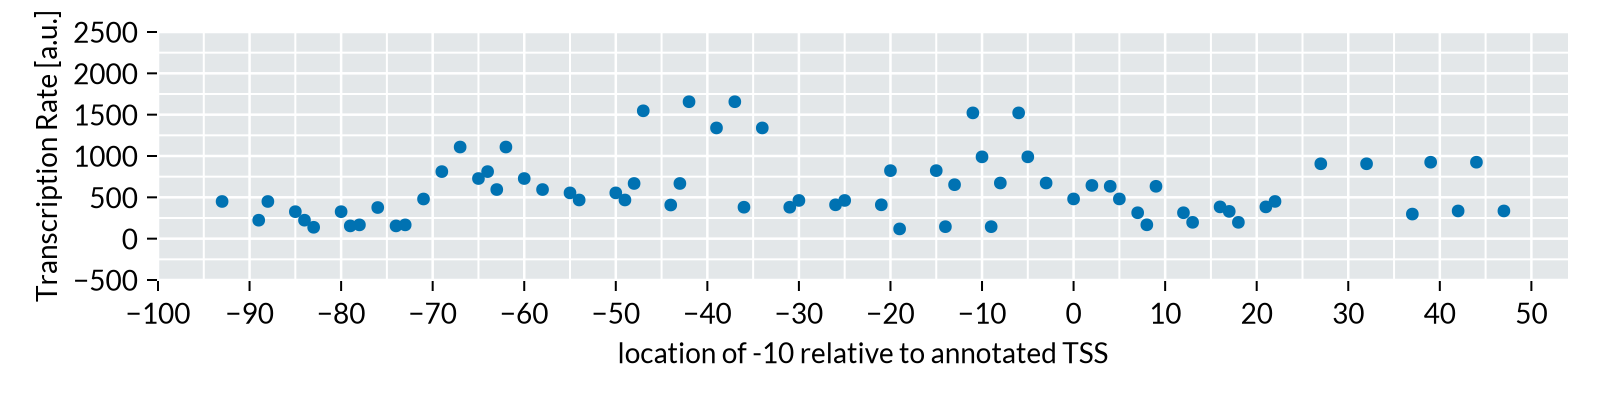

In [67]:
tss_df = DataFrame()

for m in collect(keys(r))
    append!(tss_df, DataFrame(r[m]))
end
sort!(tss_df, :dG_total)
tss_df.TSS = tss_df.TSS .- 140
tss_df.hex10_position = tss_df.hex10_position .- 140
cdf = combine(groupby(tss_df, :hex10_position), :Tx_rate => maximum)

fig = Figure(size=(800, 200))
ax = Axis(fig[1, 1], xticks=(-100:10:50), xlabel="location of -10 relative to annotated TSS", ylabel="Transcription Rate [a.u.]")

scatter!(ax, cdf.hex10_position, cdf.Tx_rate_maximum)
ylims!(-500, 2500)
#save("xylF_min_ten_mut.pdf", fig)

fig

## ldrD

In [4]:
df = wgregseq.utils.import_twist_order("../../../data/twist_orders/2022-02-15_twist_order.csv")
insertcols!(df, 4, :promoter_sequence => map(x -> x[27:186], df.sequence))
seq = df[df.promoter .== "ldrDp", "promoter_sequence"][1] |> string

"CAGCCCGGATATGAACTGCAACTATTGCAAATAAAGAAATTAAGCTGGAAGGCATCGCGCAATGAGGAAGATTGCCGGGTGCTGACAGTAAAAAGCAATCGTAGAATCAGCGGCAAGCCGGAAAGGTTCCGGTGAGGCGCAATGTTGCGGGGGCTTTATC"